# Importing packages

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from tqdm import tqdm
from matplotlib.ticker import AutoMinorLocator
import os as os
import pickle
import time
from sklearn.linear_model import Ridge
import numpy as np
import statistics
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, ConstantKernel, Matern
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from tqdm import tqdm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator 
from matplotlib import cm
import matplotlib.ticker as plticker 
import matplotlib.patches as patches

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def get_score(base='Training', actual=0,predicted=0):
    r2 = r2_score(actual,predicted)
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    print(base,r2.round(2),mae.round(3),mse.round(3))
    return r2.round(2)
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
alpha = 0.01
lasso = Lasso(alpha=alpha)
from shadow.plot import *
from new_plot import*
set_things()

In [2]:
# import matplotlib
# print('matplotlib: {}'.format(matplotlib.__version__))

# Defining General functions


In [5]:
def stats(df):
    mean= np.round((df.describe().T.iloc[[3],[1,2,3,7]].T['Total Cost'][0]/10000),2)
    std= np.round((df.describe().T.iloc[[3],[1,2,3,7]].T['Total Cost'][1]/10000),2)
    min= np.round((df.describe().T.iloc[[3],[1,2,3,7]].T['Total Cost'][2]/10000),2)
    max= np.round((df.describe().T.iloc[[3],[1,2,3,7]].T['Total Cost'][3]/10000),2)
    return(mean, std, min, max)

In [6]:
def pearson(df):
    df = df.copy(deep = True)
    corr_df = df.corr(method = 'pearson')
    vals = corr_df.iloc[[3],[0,1,2]].T['Total Cost'].to_list()
    one =   np.round(vals[0],2)
    two =   np.round(vals[1],2)
    three = np.round(vals[2],2)
    return(one, two, three)

# Defining Functions for XGBoost

In [7]:
# Workstation code:
def training(testmodel,X_train,y_train,X_val,y_val):
    matplotlib.rcParams['axes.linewidth'] = 1
    style = 'normal'
    s = 22
    s1 = 17
    w =1
    train_pred = testmodel.predict(X_train)
    val_pred = testmodel.predict(X_val)
    train_score=round((testmodel.score(X_train,y_train)),2)
    val_score= round((testmodel.score(X_val,y_val)),2)

    y_val = y_val/10000
    y_train = y_train/10000
    val_pred = val_pred/10000
    train_pred = train_pred/10000
    
    fig, ax = plt.subplots(figsize=(4.5,4.5))
    alpha = 0.5
    marker = 55
    # _= plt.plot([minimum, minimum],[minimum, minimum], color = 'white', lw = 0)
    minimum = 0
    maximum = 677
    _= plt.plot([minimum, maximum],[minimum, maximum], color = 'black', lw = 1, ls = '--', zorder= 0)

    #Training
    _= plt.scatter(y_train,train_pred,color = ['white'] , s=marker, linewidth = 1,edgecolors='darkblue', marker = '^')
    _= plt.scatter(y_train,train_pred,color = ['darkblue'] , s=marker,alpha = alpha, marker ='^' , label='$R^{2}_{train}$='+str(train_score))

    #Validation
    _= plt.scatter(y_val,val_pred,color = ['white'] , s = marker, linewidth = 1,edgecolors='firebrick', marker= 'o')
    _= plt.scatter(y_val,val_pred,color = ['firebrick'] , s=marker,alpha = alpha, marker = 'o',label='$R^{2}_{val}$='+str(val_score))

    X = [0,250,500 ]
    # X_1 = [0,5,10,15,20,25] 
    _= plt.xticks(X,X,rotation = 0, fontweight = style, fontsize = s)#X,X_1,
    _= plt.yticks(X,X,rotation = 0, fontweight = style, fontsize = s)
    _= ax.tick_params('both', length=10, width=w, which='major', top= True, right = True)
    _= ax.tick_params('both', length=5, width=w, which='minor', top= True, right = True)
    _= plt.xlabel('Actual cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    _= plt.ylabel('Predicted cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    plt.legend(prop= {'weight':'normal', 'size':s-2}, labelspacing=0.1, frameon= False,loc = 'lower right') #, loc = 'lower right' bbox_to_anchor=[0.95, 1]

    # Training inset
    left, bottom, width, height = [0.16, 0.60, 0.30, 0.27]
    ax2 = fig.add_axes([left, bottom, width, height])
    p = np.array(train_pred) 
    a = np.array(y_train)
    std=np.std(p - a)
    mean=np.mean(p - a)
    xx=mean-2*std
    yy = 0
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )

    rec = patches.Rectangle((xx,yy),4*std,np.max(y1), facecolor ='red', alpha = 0.16)
    ax2.add_patch(rec)

    _= plt.axvline(x = xx, color = 'red', lw =0.6, ls = '--')
    _= plt.axvline(x = xx+4*std, color = 'red', lw =0.6, ls = '--')
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='black',range = [-4*std, 4*std], alpha = 0.78)

    ax2.set_ylim(0,np.max(y1))  #
    ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
    xlabel_ax2 = ax2.get_xticklabels()
    ax2.yaxis.tick_right()
    ax2.yaxis.set_tick_params(labelsize =10)
    _= plt.xticks([-0.25,0,0.25],[-0.25,0,0.25],fontweight = style, fontsize = s1) # For XGBoost
    _= plt.xticks(fontweight = style, fontsize = s1) # For GPR
    _= plt.yticks(fontweight = style, fontsize = s1)
    _= ax2.xaxis.set_tick_params(labelsize =s1)  #11.8
    # _= ax2.yaxis.set_tick_params(labelsize =12)
    _= ax2.tick_params('both', length=10, width=w, which='major')
    _= ax2.tick_params('both', length=5, width=w, which='minor')
    ax2.yaxis.set_label_position("right")
    ax2.set_ylabel('\u03BD',fontsize=s1, fontweight = style, labelpad = 0)
    # ax2.set_xlabel(r'$\epsilon$ (Rs x $10^{4}$)',fontsize=s1, fontweight = style, labelpad = 0)
    # plt.savefig('./notebook_figures/parity_xgb_train.tiff',format='tiff', dpi=1200) # For XGBost
    # plt.savefig('./notebook_figures/parity_gpr_train.tiff',format='tiff', dpi=1200)  # For Gpr
    _=plt.show()



In [8]:
# Workstation code:
def testing1(testmodel,X_test,y_test):
    matplotlib.rcParams['axes.linewidth'] = 1
    style = 'normal'
    s = 22
    s1 = 17
    w =1
    test_pred = testmodel.predict(X_test)
    test_score=round((testmodel.score(X_test,y_test)),2)
    test_pred = test_pred/10000
    y_test = y_test/10000

    fig, ax = plt.subplots(figsize=(4.5,4.5))
    alpha = 0.5
    marker = 55

    minimum = 0
    maximum = 5
    _= plt.plot([minimum, maximum],[minimum, maximum], color = 'black', lw = 1, ls = '--', zorder= 0)

    #Test
    _= plt.scatter(y_test, test_pred,color = ['white'] , s = marker, linewidth = 1,edgecolors='firebrick', marker= 'o')
    _= plt.scatter(y_test, test_pred,color = ['firebrick'] , s=marker,alpha = alpha, marker = 'o',label='$R^{2}_{test}$='+str(test_score))

    X = [0,2,4]
    # X_1 = [0,5,10,15,20,25] 
    _= plt.xticks(X,X,rotation = 0, fontweight = style, fontsize = s)#X,X_1,
    _= plt.yticks(X,X,rotation = 0, fontweight = style, fontsize = s)
    _= ax.tick_params('both', length=10, width=w, which='major',top= True ,right = True)
    _= ax.tick_params('both', length=5, width=w, which='minor',top= True,right = True)
    _= plt.xlabel('Actual cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    _= plt.ylabel('Predicted cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    plt.legend(prop= {'weight':'normal', 'size':s-2}, labelspacing=0.1, frameon= False,loc = 'lower right') #, loc = 'lower right' bbox_to_anchor=[0.95, 1]

    # testing inset
    left, bottom, width, height = [0.16, 0.60, 0.30, 0.27]
    ax2 = fig.add_axes([left, bottom, width, height])
    p = np.array(test_pred) 
    a = np.array(y_test)
    std=np.std(p - a)
    mean=np.mean(p - a)
    xx=mean-2*std
    yy = 0
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    rec = patches.Rectangle((xx,yy),4*std, max(y1), facecolor ='red', alpha = 0.16)
    ax2.add_patch(rec)
    _= plt.axvline(x = xx, color = 'red', lw =0.6, ls = '--')
    _= plt.axvline(x = xx+4*std, color = 'red', lw =0.6, ls = '--')
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='black',range = [-4*std, 4*std], alpha = 0.78)

    ax2.set_ylim(0,max(y1))
    ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
    xlabel_ax2 = ax2.get_xticklabels()
    ax2.yaxis.tick_right()
    # ax2.yaxis.set_tick_params(labelsize =10,weight = 'normal')
    # X = [-1.5,0,1.5]
    _= plt.xticks(fontweight = style, fontsize = s1)
    # _= plt.xticks(X,X,fontweight = style, fontsize = s1)
    _= plt.yticks(fontweight = style, fontsize = s1)
    _= ax2.xaxis.set_tick_params(labelsize =s1)  #11.8
    # _= ax2.yaxis.set_tick_params(labelsize =12)
    _= ax2.tick_params('both', length=10, width=w, which='major')
    _= ax2.tick_params('both', length=5, width=w, which='minor')
    ax2.yaxis.set_label_position("right")
    ax2.set_ylabel('\u03BD',fontsize=s1, fontweight = style, labelpad = 0)
    ax2.set_xlabel(r'$\epsilon$ (Rs x $10^{4}$)',fontsize=s1, fontweight = style, labelpad = 0)
    # plt.savefig(f'./notebook_figures/parity_xgb_1.tiff',format='tiff', dpi=1200)
    _=plt.show()

    # .............SHAP........     

    explainer = shap.TreeExplainer(testmodel)
    shap_values_Xgboost = explainer.shap_values(X_test)
    s = 22

    new_captions = ['Dia(mm)', 'Length(m)', 'Avg depth (m)']

    plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
    plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True

    _= shap.summary_plot(shap_values_Xgboost,show = False, 
                    plot_type='bar',
                    color_bar = False,
                    color= "firebrick",
                    feature_names = new_captions,
                    features = X_test,      #Changed from X_train to X_test_scx as we are explaining all the predictions in test set
                    plot_size=[6,3.5]  # Change this size as per requirement
                    )
    _= plt.ylabel('Features', fontsize = s, fontweight = 'normal')
    fig=plt.gca()



    _= fig.spines['top'].set_visible(True) 
    _= fig.spines['right'].set_visible(True)
    _= fig.spines['left'].set_visible(True)

    visible_ticks = {
    "top": True,
    }
    _= plt.tick_params(axis="x", which="both", **visible_ticks)
    _= plt.tick_params(axis="y", which="both", **visible_ticks)
    _= plt.tick_params(axis="y", which="major", direction = 'in', left = True)
    _= plt.tick_params(axis="y", which="major", direction = 'in', right = True) #mean(|SHAP value|) (wt. %)
    _= plt.xlabel('mean(|SHAP value|) (Rs x $10^{4}$)', fontsize= s, fontweight= 'normal')
    X= [0,3,6]
    X1 = [1, 30000, 60000]
    _= plt.xticks(X1,X,fontsize = s, fontweight= 'normal')
    # _= plt.xticks(fontsize = s, fontweight= 'normal')
    _= plt.yticks(fontsize = s, fontweight= 'normal')
    _= plt.tick_params(which = 'major', width= 1, length =6)
    _= plt.tick_params(which = 'minor', width= 1, length =3)
    # plt.yaxis.tick_right()
    # plt.savefig(f'./notebook_figures/shap_xgb_1.tiff',format='tiff', dpi=1200)
    plt.show()



In [9]:
# Workstation code:
def testing4(testmodel,X_test,y_test):
    matplotlib.rcParams['axes.linewidth'] = 1
    style = 'normal'
    s = 22
    s1 = 17
    w =1
    test_pred = testmodel.predict(X_test)
    test_score=round((testmodel.score(X_test,y_test)),2)
    test_pred = test_pred/10000
    y_test = y_test/10000

    fig, ax = plt.subplots(figsize=(4.5,4.5))
    alpha = 0.5
    marker = 55

    minimum = 0
    maximum = 55
    _= plt.plot([minimum, maximum],[minimum, maximum], color = 'black', lw = 1, ls = '--', zorder= 0)

    #Test
    _= plt.scatter(y_test, test_pred,color = ['white'] , s = marker, linewidth = 1,edgecolors='firebrick', marker= 'o')
    _= plt.scatter(y_test, test_pred,color = ['firebrick'] , s=marker,alpha = alpha, marker = 'o',label='$R^{2}_{test}$='+str(test_score))

    X = [0,25,50]
    _= plt.xticks(X,X,rotation = 0, fontweight = style, fontsize = s)#X,X_1,
    _= plt.yticks(X,X,rotation = 0, fontweight = style, fontsize = s)
    _= ax.tick_params('both', length=10, width=w, which='major',top= True ,right = True)
    _= ax.tick_params('both', length=5, width=w, which='minor',top= True,right = True)
    _= plt.xlabel('Actual cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    _= plt.ylabel('Predicted cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    plt.legend(prop= {'weight':'normal', 'size':s-2}, labelspacing=0.1, frameon= False,loc = 'lower right') #, loc = 'lower right' bbox_to_anchor=[0.95, 1]

    # testing inset
    left, bottom, width, height = [0.16, 0.60, 0.30, 0.27]
    ax2 = fig.add_axes([left, bottom, width, height])
    p = np.array(test_pred) 
    a = np.array(y_test)
    std=np.std(p - a)
    mean=np.mean(p - a)
    xx=mean-2*std
    yy = 0
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    rec = patches.Rectangle((xx,yy),4*std, max(y1), facecolor ='red', alpha = 0.16)
    ax2.add_patch(rec)
    _= plt.axvline(x = xx, color = 'red', lw =0.6, ls = '--')
    _= plt.axvline(x = xx+4*std, color = 'red', lw =0.6, ls = '--')
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='black',range = [-4*std, 4*std], alpha = 0.78)

    ax2.set_ylim(0,max(y1))
    ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
    xlabel_ax2 = ax2.get_xticklabels()
    ax2.yaxis.tick_right()
    # ax2.yaxis.set_tick_params(labelsize =10,weight = 'normal')
    # X = [-1.5,0,1.5]
    _= plt.xticks(fontweight = style, fontsize = s1)
    # _= plt.xticks(X,X,fontweight = style, fontsize = s1)
    _= plt.yticks(fontweight = style, fontsize = s1)
    _= ax2.xaxis.set_tick_params(labelsize =s1)  #11.8
    # _= ax2.yaxis.set_tick_params(labelsize =12)
    _= ax2.tick_params('both', length=10, width=w, which='major')
    _= ax2.tick_params('both', length=5, width=w, which='minor')
    ax2.yaxis.set_label_position("right")
    ax2.set_ylabel('\u03BD',fontsize=s1, fontweight = style, labelpad = 0)
    ax2.set_xlabel(r'$\epsilon$ (Rs x $10^{4}$)',fontsize=s1, fontweight = style, labelpad = 0)
    # plt.savefig(f'./notebook_figures/parity_xgb_4.tiff',format='tiff', dpi=1200)
    _=plt.show()

    # .............SHAP........     

    explainer = shap.TreeExplainer(testmodel)
    shap_values_Xgboost = explainer.shap_values(X_test)
    s = 22

    new_captions = ['Dia(mm)', 'Length(m)', 'Avg depth (m)']

    plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
    plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True

    _= shap.summary_plot(shap_values_Xgboost,show = False, 
                    plot_type='bar',
                    color_bar = False,
                    color= "firebrick",
                    feature_names = new_captions,
                    features = X_test,      #Changed from X_train to X_test_scx as we are explaining all the predictions in test set
                    plot_size=[6,3.5]  # Change this size as per requirement
                    )
    _= plt.ylabel('Features', fontsize = s, fontweight = 'normal')
    fig=plt.gca()



    _= fig.spines['top'].set_visible(True) 
    _= fig.spines['right'].set_visible(True)
    _= fig.spines['left'].set_visible(True)

    visible_ticks = {
    "top": True,
    }
    _= plt.tick_params(axis="x", which="both", **visible_ticks)
    _= plt.tick_params(axis="y", which="both", **visible_ticks)
    _= plt.tick_params(axis="y", which="major", direction = 'in', left = True)
    _= plt.tick_params(axis="y", which="major", direction = 'in', right = True) #mean(|SHAP value|) (wt. %)
    _= plt.xlabel('mean(|SHAP value|) (Rs x $10^{4}$)', fontsize= s, fontweight= 'normal')

    X= [0,4,8]
    X1 = [1, 40000, 80000]
    _= plt.xticks(X1,X,fontsize = s, fontweight= 'normal')
    _= plt.xticks(fontsize = s, fontweight= 'normal')

    _= plt.yticks(fontsize = s, fontweight= 'normal')
    _= plt.tick_params(which = 'major', width= 1, length =6)
    _= plt.tick_params(which = 'minor', width= 1, length =3)
    # plt.yaxis.tick_right()
    # plt.savefig(f'./notebook_figures/shap_xgb_4.tiff',format='tiff', dpi=1200)
    plt.show()



In [10]:
# Workstation code:
def testing5(testmodel,X_test,y_test):
    matplotlib.rcParams['axes.linewidth'] = 1
    style = 'normal'
    s = 22
    s1 = 17
    w =1
    test_pred = testmodel.predict(X_test)
    test_score=round((testmodel.score(X_test,y_test)),2)
    test_pred = test_pred/10000
    y_test = y_test/10000

    fig, ax = plt.subplots(figsize=(4.5,4.5))
    alpha = 0.5
    marker = 55

    minimum = 0
    maximum = 50
    _= plt.plot([minimum, maximum],[minimum, maximum], color = 'black', lw = 1, ls = '--', zorder= 0)

    #Test
    _= plt.scatter(y_test, test_pred,color = ['white'] , s = marker, linewidth = 1,edgecolors='firebrick', marker= 'o')
    _= plt.scatter(y_test, test_pred,color = ['firebrick'] , s=marker,alpha = alpha, marker = 'o',label='$R^{2}_{test}$='+str(test_score))

    X = [0,20,40]
    # X_1 = [0,5,10,15,20,25] 
    _= plt.xticks(X,X,rotation = 0, fontweight = style, fontsize = s)#X,X_1,
    _= plt.yticks(X,X,rotation = 0, fontweight = style, fontsize = s)
    _= ax.tick_params('both', length=10, width=w, which='major',top= True ,right = True)
    _= ax.tick_params('both', length=5, width=w, which='minor',top= True,right = True)
    _= plt.xlabel('Actual cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    _= plt.ylabel('Predicted cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    plt.legend(prop= {'weight':'normal', 'size':s-2}, labelspacing=0.1, frameon= False,loc = 'lower right') #, loc = 'lower right' bbox_to_anchor=[0.95, 1]

    # testing inset
    left, bottom, width, height = [0.16, 0.60, 0.30, 0.27]
    ax2 = fig.add_axes([left, bottom, width, height])
    p = np.array(test_pred) 
    a = np.array(y_test)
    std=np.std(p - a)
    mean=np.mean(p - a)
    xx=mean-2*std
    yy = 0
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    rec = patches.Rectangle((xx,yy),4*std, max(y1), facecolor ='red', alpha = 0.16)
    ax2.add_patch(rec)
    _= plt.axvline(x = xx, color = 'red', lw =0.6, ls = '--')
    _= plt.axvline(x = xx+4*std, color = 'red', lw =0.6, ls = '--')
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='black',range = [-4*std, 4*std], alpha = 0.78)

    ax2.set_ylim(0,max(y1))
    ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
    xlabel_ax2 = ax2.get_xticklabels()
    ax2.yaxis.tick_right()
    # ax2.yaxis.set_tick_params(labelsize =10,weight = 'normal')
    # X = [-1.5,0,1.5]
    _= plt.xticks(fontweight = style, fontsize = s1)
    # _= plt.xticks(X,X,fontweight = style, fontsize = s1)
    _= plt.yticks(fontweight = style, fontsize = s1)
    _= ax2.xaxis.set_tick_params(labelsize =s1)  #11.8
    # _= ax2.yaxis.set_tick_params(labelsize =12)
    _= ax2.tick_params('both', length=10, width=w, which='major')
    _= ax2.tick_params('both', length=5, width=w, which='minor')
    ax2.yaxis.set_label_position("right")
    ax2.set_ylabel('\u03BD',fontsize=s1, fontweight = style, labelpad = 0)
    ax2.set_xlabel(r'$\epsilon$ (Rs x $10^{4}$)',fontsize=s1, fontweight = style, labelpad = 0)
    # plt.savefig(f'./notebook_figures/parity_xgb_5.tiff',format='tiff', dpi=1200)
    _=plt.show()

    # .............SHAP........     

    explainer = shap.TreeExplainer(testmodel)
    shap_values_Xgboost = explainer.shap_values(X_test)
    s = 22

    new_captions = ['Dia(mm)', 'Length(m)', 'Avg depth (m)']

    plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
    plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True

    _= shap.summary_plot(shap_values_Xgboost,show = False, 
                    plot_type='bar',
                    color_bar = False,
                    color= "firebrick",
                    feature_names = new_captions,
                    features = X_test,      #Changed from X_train to X_test_scx as we are explaining all the predictions in test set
                    plot_size=[6,3.5]  # Change this size as per requirement
                    )
    _= plt.ylabel('Features', fontsize = s, fontweight = 'normal')
    fig=plt.gca()



    _= fig.spines['top'].set_visible(True) 
    _= fig.spines['right'].set_visible(True)
    _= fig.spines['left'].set_visible(True)

    visible_ticks = {
    "top": True,
    }
    _= plt.tick_params(axis="x", which="both", **visible_ticks)
    _= plt.tick_params(axis="y", which="both", **visible_ticks)
    _= plt.tick_params(axis="y", which="major", direction = 'in', left = True)
    _= plt.tick_params(axis="y", which="major", direction = 'in', right = True) #mean(|SHAP value|) (wt. %)
    _= plt.xlabel('mean(|SHAP value|) (Rs x $10^{4}$)', fontsize= s, fontweight= 'normal')
    X= [0,2,4]
    X1 = [1, 20000, 40000]
    _= plt.xticks(X1,X,fontsize = s, fontweight= 'normal')
    # _= plt.xticks(fontsize = s, fontweight= 'normal')
    _= plt.yticks(fontsize = s, fontweight= 'normal')
    _= plt.tick_params(which = 'major', width= 1, length =6)
    _= plt.tick_params(which = 'minor', width= 1, length =3)
    # plt.yaxis.tick_right()
    # plt.savefig(f'./notebook_figures/shap_xgb_5.tiff',format='tiff', dpi=1200)
    plt.show()



In [11]:
# Workstation code:
def testing6(testmodel,X_test,y_test):
    matplotlib.rcParams['axes.linewidth'] = 1
    style = 'normal'
    s = 22
    s1 = 17
    w =1
    test_pred = testmodel.predict(X_test)
    test_score=round((testmodel.score(X_test,y_test)),2)
    test_pred = test_pred/10000
    y_test = y_test/10000

    fig, ax = plt.subplots(figsize=(4.5,4.5))
    alpha = 0.5
    marker = 55

    minimum = 0
    maximum = 85
    _= plt.plot([minimum, maximum],[minimum, maximum], color = 'black', lw = 1, ls = '--', zorder= 0)

    #Test
    _= plt.scatter(y_test, test_pred,color = ['white'] , s = marker, linewidth = 1,edgecolors='firebrick', marker= 'o')
    _= plt.scatter(y_test, test_pred,color = ['firebrick'] , s=marker,alpha = alpha, marker = 'o',label='$R^{2}_{test}$='+str(test_score))

    X = [0,40,80]
    # X_1 = [0,5,10,15,20,25] 
    _= plt.xticks(X,X,rotation = 0, fontweight = style, fontsize = s)#X,X_1,
    _= plt.yticks(X,X,rotation = 0, fontweight = style, fontsize = s)
    _= ax.tick_params('both', length=10, width=w, which='major',top= True ,right = True)
    _= ax.tick_params('both', length=5, width=w, which='minor',top= True,right = True)
    _= plt.xlabel('Actual cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    _= plt.ylabel('Predicted cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    plt.legend(prop= {'weight':'normal', 'size':s-2}, labelspacing=0.1, frameon= False,loc = 'lower right') #, loc = 'lower right' bbox_to_anchor=[0.95, 1]

    # testing inset
    left, bottom, width, height = [0.16, 0.60, 0.30, 0.27]
    ax2 = fig.add_axes([left, bottom, width, height])
    p = np.array(test_pred) 
    a = np.array(y_test)
    std=np.std(p - a)
    mean=np.mean(p - a)
    xx=mean-2*std
    yy = 0
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    rec = patches.Rectangle((xx,yy),4*std, max(y1), facecolor ='red', alpha = 0.16)
    ax2.add_patch(rec)
    _= plt.axvline(x = xx, color = 'red', lw =0.6, ls = '--')
    _= plt.axvline(x = xx+4*std, color = 'red', lw =0.6, ls = '--')
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='black',range = [-4*std, 4*std], alpha = 0.78)

    ax2.set_ylim(0,max(y1))
    ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
    xlabel_ax2 = ax2.get_xticklabels()
    ax2.yaxis.tick_right()
    # ax2.yaxis.set_tick_params(labelsize =10,weight = 'normal')
    # X = [-1.5,0,1.5]
    _= plt.xticks(fontweight = style, fontsize = s1)
    # _= plt.xticks(X,X,fontweight = style, fontsize = s1)
    _= plt.yticks(fontweight = style, fontsize = s1)
    _= ax2.xaxis.set_tick_params(labelsize =s1)  #11.8
    # _= ax2.yaxis.set_tick_params(labelsize =12)
    _= ax2.tick_params('both', length=10, width=w, which='major')
    _= ax2.tick_params('both', length=5, width=w, which='minor')
    ax2.yaxis.set_label_position("right")
    ax2.set_ylabel('\u03BD',fontsize=s1, fontweight = style, labelpad = 0)
    ax2.set_xlabel(r'$\epsilon$ (Rs x $10^{4}$)',fontsize=s1, fontweight = style, labelpad = 0)
    # plt.savefig(f'./notebook_figures/parity_xgb_6.tiff',format='tiff', dpi=1200)
    _=plt.show()

    # .............SHAP........     

    explainer = shap.TreeExplainer(testmodel)
    shap_values_Xgboost = explainer.shap_values(X_test)
    s = 22

    new_captions = ['Dia(mm)', 'Length(m)', 'Avg depth (m)']

    plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
    plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True

    _= shap.summary_plot(shap_values_Xgboost,show = False, 
                    plot_type='bar',
                    color_bar = False,
                    color= "firebrick",
                    feature_names = new_captions,
                    features = X_test,      #Changed from X_train to X_test_scx as we are explaining all the predictions in test set
                    plot_size=[6,3.5]  # Change this size as per requirement
                    )
    _= plt.ylabel('Features', fontsize = s, fontweight = 'normal')
    fig=plt.gca()



    _= fig.spines['top'].set_visible(True) 
    _= fig.spines['right'].set_visible(True)
    _= fig.spines['left'].set_visible(True)

    visible_ticks = {
    "top": True,
    }
    _= plt.tick_params(axis="x", which="both", **visible_ticks)
    _= plt.tick_params(axis="y", which="both", **visible_ticks)
    _= plt.tick_params(axis="y", which="major", direction = 'in', left = True)
    _= plt.tick_params(axis="y", which="major", direction = 'in', right = True) #mean(|SHAP value|) (wt. %)
    _= plt.xlabel('mean(|SHAP value|) (Rs x $10^{4}$)', fontsize= s, fontweight= 'normal')
    X= [0,4,8]
    X1 = [1, 40000, 80000]
    _= plt.xticks(X1,X,fontsize = s, fontweight= 'normal')
    # _= plt.xticks(fontsize = s, fontweight= 'normal')
    _= plt.yticks(fontsize = s, fontweight= 'normal')
    _= plt.tick_params(which = 'major', width= 1, length =6)
    _= plt.tick_params(which = 'minor', width= 1, length =3)
    # plt.yaxis.tick_right()
    # plt.savefig(f'./notebook_figures/shap_xgb_6.tiff',format='tiff', dpi=1200)
    plt.show()



# Defining functions for GPR

In [12]:
# Workstation code:
def testing1gpr(testmodel,X_test,y_test):
    matplotlib.rcParams['axes.linewidth'] = 1
    style = 'normal'
    s = 22
    s1 = 17
    w =1
    test_pred = testmodel.predict(X_test)
    test_score=round((testmodel.score(X_test,y_test)),2)
    test_pred = test_pred/10000
    y_test = y_test/10000

    fig, ax = plt.subplots(figsize=(4.5,4.5))
    alpha = 0.5
    marker = 55

    minimum = -1
    maximum = 5
    _= plt.plot([minimum, maximum],[minimum, maximum], color = 'black', lw = 1, ls = '--', zorder= 0)

    #Test
    _= plt.scatter(y_test, test_pred,color = ['white'] , s = marker, linewidth = 1,edgecolors='firebrick', marker= 'o')
    _= plt.scatter(y_test, test_pred,color = ['firebrick'] , s=marker,alpha = alpha, marker = 'o',label='$R^{2}_{test}$='+str(test_score))

    X = [0,2,4]
    # X_1 = [0,5,10,15,20,25] 
    _= plt.xticks(X,X,rotation = 0, fontweight = style, fontsize = s)#X,X_1,
    _= plt.yticks(X,X,rotation = 0, fontweight = style, fontsize = s)
    _= ax.tick_params('both', length=10, width=w, which='major',top= True ,right = True)
    _= ax.tick_params('both', length=5, width=w, which='minor',top= True,right = True)
    _= plt.xlabel('Actual cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    _= plt.ylabel('Predicted cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    plt.legend(prop= {'weight':'normal', 'size':s-2}, labelspacing=0.1, frameon= False,loc = 'lower right') #, loc = 'lower right' bbox_to_anchor=[0.95, 1]

    # testing inset
    left, bottom, width, height = [0.16, 0.60, 0.30, 0.27]
    ax2 = fig.add_axes([left, bottom, width, height])
    p = np.array(test_pred) 
    a = np.array(y_test)
    std=np.std(p - a)
    mean=np.mean(p - a)
    xx=mean-2*std
    yy = 0
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    rec = patches.Rectangle((xx,yy),4*std, np.max(y1), facecolor ='red', alpha = 0.16)
    ax2.add_patch(rec)
    _= plt.axvline(x = xx, color = 'red', lw =0.6, ls = '--')
    _= plt.axvline(x = xx+4*std, color = 'red', lw =0.6, ls = '--')
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='black',range = [-4*std, 4*std], alpha = 0.78)

    ax2.set_ylim(0,np.max(y1))
    ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
    xlabel_ax2 = ax2.get_xticklabels()
    ax2.yaxis.tick_right()
    # ax2.yaxis.set_tick_params(labelsize =10,weight = 'normal')
    # X = [-1.5,0,1.5]
    _= plt.xticks(fontweight = style, fontsize = s1)
    # _= plt.xticks(X,X,fontweight = style, fontsize = s1)
    _= plt.yticks(fontweight = style, fontsize = s1)
    _= ax2.xaxis.set_tick_params(labelsize =s1)  #11.8
    # _= ax2.yaxis.set_tick_params(labelsize =12)
    _= ax2.tick_params('both', length=10, width=w, which='major')
    _= ax2.tick_params('both', length=5, width=w, which='minor')
    ax2.yaxis.set_label_position("right")
    ax2.set_ylabel('\u03BD',fontsize=s1, fontweight = style, labelpad = 0)
    ax2.set_xlabel(r'$\epsilon$ (Rs x $10^{4}$)',fontsize=s1, fontweight = style, labelpad = 0)
    # plt.savefig(f'./notebook_figures/parity_gpr_1.tiff',format='tiff', dpi=1200)
    _=plt.show()

    # .............SHAP........     

    # explainer = shap.TreeExplainer(testmodel)
    shap_values_gpr = explainer_gpr(X_test)
    s = 22

    new_captions = ['Dia(mm)', 'Length(m)', 'Avg depth (m)']

    plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
    plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True

    _= shap.summary_plot(shap_values_gpr,show = False, 
                    plot_type='bar',
                    color_bar = False,
                    color= "firebrick",
                    feature_names = new_captions,
                    features = X_test,      #Changed from X_train to X_test_scx as we are explaining all the predictions in test set
                    plot_size=[6,3.5]  # Change this size as per requirement
                    )
    _= plt.ylabel('Features', fontsize = s, fontweight = 'normal')
    fig=plt.gca()



    _= fig.spines['top'].set_visible(True) 
    _= fig.spines['right'].set_visible(True)
    _= fig.spines['left'].set_visible(True)

    visible_ticks = {
    "top": True,
    }
    _= plt.tick_params(axis="x", which="both", **visible_ticks)
    _= plt.tick_params(axis="y", which="both", **visible_ticks)
    _= plt.tick_params(axis="y", which="major", direction = 'in', left = True)
    _= plt.tick_params(axis="y", which="major", direction = 'in', right = True) #mean(|SHAP value|) (wt. %)
    _= plt.xlabel('mean(|SHAP value|) (Rs x $10^{4}$)', fontsize= s, fontweight= 'normal')
    X= [0,3,6]
    X1 = [1, 30000, 60000]
    _= plt.xticks(X1,X,fontsize = s, fontweight= 'normal')
    # _= plt.xticks(fontsize = s, fontweight= 'normal')
    _= plt.yticks(fontsize = s, fontweight= 'normal')
    _= plt.tick_params(which = 'major', width= 1, length =6)
    _= plt.tick_params(which = 'minor', width= 1, length =3)
    # plt.yaxis.tick_right()
    # plt.savefig(f'./notebook_figures/shap_gpr_1.tiff',format='tiff', dpi=1200)
    plt.show()



In [13]:
# Workstation code:
def testing4gpr(testmodel,X_test,y_test):
    matplotlib.rcParams['axes.linewidth'] = 1
    style = 'normal'
    s = 22
    s1 = 17
    w =1
    test_pred = testmodel.predict(X_test)
    test_score=round((testmodel.score(X_test,y_test)),2)
    test_pred = test_pred/10000
    y_test = y_test/10000

    fig, ax = plt.subplots(figsize=(4.5,4.5))
    alpha = 0.5
    marker = 55

    minimum = 0
    maximum = 55
    _= plt.plot([minimum, maximum],[minimum, maximum], color = 'black', lw = 1, ls = '--', zorder= 0)

    #Test
    _= plt.scatter(y_test, test_pred,color = ['white'] , s = marker, linewidth = 1,edgecolors='firebrick', marker= 'o')
    _= plt.scatter(y_test, test_pred,color = ['firebrick'] , s=marker,alpha = alpha, marker = 'o',label='$R^{2}_{test}$='+str(test_score))

    X = [0,25,50]
    _= plt.xticks(X,X,rotation = 0, fontweight = style, fontsize = s)#X,X_1,
    _= plt.yticks(X,X,rotation = 0, fontweight = style, fontsize = s)
    _= ax.tick_params('both', length=10, width=w, which='major',top= True ,right = True)
    _= ax.tick_params('both', length=5, width=w, which='minor',top= True,right = True)
    _= plt.xlabel('Actual cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    _= plt.ylabel('Predicted cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    plt.legend(prop= {'weight':'normal', 'size':s-2}, labelspacing=0.1, frameon= False,loc = 'lower right') #, loc = 'lower right' bbox_to_anchor=[0.95, 1]

    # testing inset
    left, bottom, width, height = [0.16, 0.60, 0.30, 0.27]
    ax2 = fig.add_axes([left, bottom, width, height])
    p = np.array(test_pred) 
    a = np.array(y_test)
    std=np.std(p - a)
    mean=np.mean(p - a)
    xx=mean-2*std
    yy = 0
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    rec = patches.Rectangle((xx,yy),4*std, np.max(y1), facecolor ='red', alpha = 0.16)
    ax2.add_patch(rec)
    _= plt.axvline(x = xx, color = 'red', lw =0.6, ls = '--')
    _= plt.axvline(x = xx+4*std, color = 'red', lw =0.6, ls = '--')
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='black',range = [-4*std, 4*std], alpha = 0.78)

    ax2.set_ylim(0,np.max(y1))
    ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
    xlabel_ax2 = ax2.get_xticklabels()
    ax2.yaxis.tick_right()
    # ax2.yaxis.set_tick_params(labelsize =10,weight = 'normal')
    # X = [-1.5,0,1.5]
    _= plt.xticks(fontweight = style, fontsize = s1)
    # _= plt.xticks(X,X,fontweight = style, fontsize = s1)
    _= plt.yticks(fontweight = style, fontsize = s1)
    _= ax2.xaxis.set_tick_params(labelsize =s1)  #11.8
    # _= ax2.yaxis.set_tick_params(labelsize =12)
    _= ax2.tick_params('both', length=10, width=w, which='major')
    _= ax2.tick_params('both', length=5, width=w, which='minor')
    ax2.yaxis.set_label_position("right")
    ax2.set_ylabel('\u03BD',fontsize=s1, fontweight = style, labelpad = 0)
    ax2.set_xlabel(r'$\epsilon$ (Rs x $10^{4}$)',fontsize=s1, fontweight = style, labelpad = 0)
    # plt.savefig(f'./notebook_figures/parity_gpr_4.tiff',format='tiff', dpi=1200)
    _=plt.show()

    # .............SHAP........     

    # explainer = shap.TreeExplainer(testmodel)
    shap_values_gpr = explainer_gpr(X_test)
    s = 22

    new_captions = ['Dia(mm)', 'Length(m)', 'Avg depth (m)']

    plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
    plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True

    _= shap.summary_plot(shap_values_gpr,show = False, 
                    plot_type='bar',
                    color_bar = False,
                    color= "firebrick",
                    feature_names = new_captions,
                    features = X_test,      #Changed from X_train to X_test_scx as we are explaining all the predictions in test set
                    plot_size=[6,3.5]  # Change this size as per requirement
                    )
    _= plt.ylabel('Features', fontsize = s, fontweight = 'normal')
    fig=plt.gca()



    _= fig.spines['top'].set_visible(True) 
    _= fig.spines['right'].set_visible(True)
    _= fig.spines['left'].set_visible(True)

    visible_ticks = {
    "top": True,
    }
    _= plt.tick_params(axis="x", which="both", **visible_ticks)
    _= plt.tick_params(axis="y", which="both", **visible_ticks)
    _= plt.tick_params(axis="y", which="major", direction = 'in', left = True)
    _= plt.tick_params(axis="y", which="major", direction = 'in', right = True) #mean(|SHAP value|) (wt. %)
    _= plt.xlabel('mean(|SHAP value|) (Rs x $10^{4}$)', fontsize= s, fontweight= 'normal')

    X= [0,4,8]
    X1 = [1, 40000, 80000]
    _= plt.xticks(X1,X,fontsize = s, fontweight= 'normal')
    _= plt.xticks(fontsize = s, fontweight= 'normal')

    _= plt.yticks(fontsize = s, fontweight= 'normal')
    _= plt.tick_params(which = 'major', width= 1, length =6)
    _= plt.tick_params(which = 'minor', width= 1, length =3)
    # plt.yaxis.tick_right()
    # plt.savefig(f'./notebook_figures/shap_gpr_4.tiff',format='tiff', dpi=1200)
    plt.show()



In [14]:
# Workstation code:
def testing5gpr(testmodel,X_test,y_test):
    matplotlib.rcParams['axes.linewidth'] = 1
    style = 'normal'
    s = 22
    s1 = 17
    w =1
    test_pred = testmodel.predict(X_test)
    test_score=round((testmodel.score(X_test,y_test)),2)
    test_pred = test_pred/10000
    y_test = y_test/10000

    fig, ax = plt.subplots(figsize=(4.5,4.5))
    alpha = 0.5
    marker = 55

    minimum = 0
    maximum = 50
    _= plt.plot([minimum, maximum],[minimum, maximum], color = 'black', lw = 1, ls = '--', zorder= 10)

    #Test
    _= plt.scatter(y_test, test_pred,color = ['white'] , s = marker, linewidth = 1,edgecolors='firebrick', marker= 'o')
    _= plt.scatter(y_test, test_pred,color = ['firebrick'] , s=marker,alpha = alpha, marker = 'o',label='$R^{2}_{test}$='+str(test_score))

    X = [0,20,40]
    # X_1 = [0,5,10,15,20,25] 
    _= plt.xticks(X,X,rotation = 0, fontweight = style, fontsize = s)#X,X_1,
    _= plt.yticks(X,X,rotation = 0, fontweight = style, fontsize = s)
    _= ax.tick_params('both', length=10, width=w, which='major',top= True ,right = True)
    _= ax.tick_params('both', length=5, width=w, which='minor',top= True,right = True)
    _= plt.xlabel('Actual cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    _= plt.ylabel('Predicted cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    plt.legend(prop= {'weight':'normal', 'size':s-2}, labelspacing=0.1, frameon= False,loc = 'lower right') #, loc = 'lower right' bbox_to_anchor=[0.95, 1]

    # testing inset
    left, bottom, width, height = [0.16, 0.60, 0.30, 0.27]
    ax2 = fig.add_axes([left, bottom, width, height])
    p = np.array(test_pred) 
    a = np.array(y_test)
    std=np.std(p - a)
    mean=np.mean(p - a)
    xx=mean-2*std
    yy = 0
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    rec = patches.Rectangle((xx,yy),4*std, np.max(y1), facecolor ='red', alpha = 0.16)
    ax2.add_patch(rec)
    _= plt.axvline(x = xx, color = 'red', lw =0.6, ls = '--')
    _= plt.axvline(x = xx+4*std, color = 'red', lw =0.6, ls = '--')
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='black',range = [-4*std, 4*std], alpha = 0.78)

    ax2.set_ylim(0,np.max(y1))
    ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
    xlabel_ax2 = ax2.get_xticklabels()
    ax2.yaxis.tick_right()
    # ax2.yaxis.set_tick_params(labelsize =10,weight = 'normal')
    # X = [-1.5,0,1.5]
    _= plt.xticks(fontweight = style, fontsize = s1)
    # _= plt.xticks(X,X,fontweight = style, fontsize = s1)
    _= plt.yticks(fontweight = style, fontsize = s1)
    _= ax2.xaxis.set_tick_params(labelsize =s1)  #11.8
    # _= ax2.yaxis.set_tick_params(labelsize =12)
    _= ax2.tick_params('both', length=10, width=w, which='major')
    _= ax2.tick_params('both', length=5, width=w, which='minor')
    ax2.yaxis.set_label_position("right")
    ax2.set_ylabel('\u03BD',fontsize=s1, fontweight = style, labelpad = 0)
    ax2.set_xlabel(r'$\epsilon$ (Rs x $10^{4}$)',fontsize=s1, fontweight = style, labelpad = 0)
    # plt.savefig(f'./notebook_figures/parity_gpr_5.tiff',format='tiff', dpi=1200)
    _=plt.show()

    # .............SHAP........     

    # explainer = shap.TreeExplainer(testmodel)
    shap_values_gpr = explainer_gpr(X_test)
    s = 22

    new_captions = ['Dia(mm)', 'Length(m)', 'Avg depth (m)']

    plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
    plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True

    _= shap.summary_plot(shap_values_gpr,show = False, 
                    plot_type='bar',
                    color_bar = False,
                    color= "firebrick",
                    feature_names = new_captions,
                    features = X_test,      #Changed from X_train to X_test_scx as we are explaining all the predictions in test set
                    plot_size=[6,3.5]  # Change this size as per requirement
                    )
    _= plt.ylabel('Features', fontsize = s, fontweight = 'normal')
    fig=plt.gca()



    _= fig.spines['top'].set_visible(True) 
    _= fig.spines['right'].set_visible(True)
    _= fig.spines['left'].set_visible(True)

    visible_ticks = {
    "top": True,
    }
    _= plt.tick_params(axis="x", which="both", **visible_ticks)
    _= plt.tick_params(axis="y", which="both", **visible_ticks)
    _= plt.tick_params(axis="y", which="major", direction = 'in', left = True)
    _= plt.tick_params(axis="y", which="major", direction = 'in', right = True) #mean(|SHAP value|) (wt. %)
    _= plt.xlabel('mean(|SHAP value|) (Rs x $10^{4}$)', fontsize= s, fontweight= 'normal')
    X= [0,2,4]
    X1 = [1, 20000, 40000]
    _= plt.xticks(X1,X,fontsize = s, fontweight= 'normal')
    # _= plt.xticks(fontsize = s, fontweight= 'normal')
    _= plt.yticks(fontsize = s, fontweight= 'normal')
    _= plt.tick_params(which = 'major', width= 1, length =6)
    _= plt.tick_params(which = 'minor', width= 1, length =3)
    # plt.yaxis.tick_right()
    # plt.savefig(f'./notebook_figures/shap_gpr_5.tiff',format='tiff', dpi=1200)
    plt.show()



In [15]:
# Workstation code:
def testing6gpr(testmodel,X_test,y_test):
    matplotlib.rcParams['axes.linewidth'] = 1
    style = 'normal'
    s = 22
    s1 = 17
    w =1
    test_pred = testmodel.predict(X_test)
    test_score=round((testmodel.score(X_test,y_test)),2)
    test_pred = test_pred/10000
    y_test = y_test/10000

    fig, ax = plt.subplots(figsize=(4.5,4.5))
    alpha = 0.5
    marker = 55

    minimum = 0
    maximum = 85
    _= plt.plot([minimum, maximum],[minimum, maximum], color = 'black', lw = 1, ls = '--', zorder= 10)

    #Test
    _= plt.scatter(y_test, test_pred,color = ['white'] , s = marker, linewidth = 1,edgecolors='firebrick', marker= 'o')
    _= plt.scatter(y_test, test_pred,color = ['firebrick'] , s=marker,alpha = alpha, marker = 'o',label='$R^{2}_{test}$='+str(test_score))

    X = [0,40,80]
    # X_1 = [0,5,10,15,20,25] 
    _= plt.xticks(X,X,rotation = 0, fontweight = style, fontsize = s)#X,X_1,
    _= plt.yticks(X,X,rotation = 0, fontweight = style, fontsize = s)
    _= ax.tick_params('both', length=10, width=w, which='major',top= True ,right = True)
    _= ax.tick_params('both', length=5, width=w, which='minor',top= True,right = True)
    _= plt.xlabel('Actual cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    _= plt.ylabel('Predicted cost (Rs x $10^{4}$)', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    plt.legend(prop= {'weight':'normal', 'size':s-2}, labelspacing=0.1, frameon= False,loc = 'lower right') #, loc = 'lower right' bbox_to_anchor=[0.95, 1]

    # testing inset
    left, bottom, width, height = [0.16, 0.60, 0.30, 0.27]
    ax2 = fig.add_axes([left, bottom, width, height])
    p = np.array(test_pred) 
    a = np.array(y_test)
    std=np.std(p - a)
    mean=np.mean(p - a)
    xx=mean-2*std
    yy = 0
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    rec = patches.Rectangle((xx,yy),4*std, np.max(y1), facecolor ='red', alpha = 0.16)
    ax2.add_patch(rec)
    _= plt.axvline(x = xx, color = 'red', lw =0.6, ls = '--')
    _= plt.axvline(x = xx+4*std, color = 'red', lw =0.6, ls = '--')
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='black',range = [-4*std, 4*std], alpha = 0.78)

    ax2.set_ylim(0,np.max(y1))
    ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
    xlabel_ax2 = ax2.get_xticklabels()
    ax2.yaxis.tick_right()
    # ax2.yaxis.set_tick_params(labelsize =10,weight = 'normal')
    # X = [-1.5,0,1.5]
    _= plt.xticks(fontweight = style, fontsize = s1)
    # _= plt.xticks(X,X,fontweight = style, fontsize = s1)
    _= plt.yticks(fontweight = style, fontsize = s1)
    _= ax2.xaxis.set_tick_params(labelsize =s1)  #11.8
    # _= ax2.yaxis.set_tick_params(labelsize =12)
    _= ax2.tick_params('both', length=10, width=w, which='major')
    _= ax2.tick_params('both', length=5, width=w, which='minor')
    ax2.yaxis.set_label_position("right")
    ax2.set_ylabel('\u03BD',fontsize=s1, fontweight = style, labelpad = 0)
    ax2.set_xlabel(r'$\epsilon$ (Rs x $10^{4}$)',fontsize=s1, fontweight = style, labelpad = 0)
    # plt.savefig(f'./notebook_figures/parity_gpr_6.tiff',format='tiff', dpi=1200)
    _=plt.show()

    # .............SHAP........     

    # explainer = shap.TreeExplainer(testmodel)
    shap_values_gpr =explainer_gpr(X_test)
    s = 22

    new_captions = ['Dia(mm)', 'Length(m)', 'Avg depth (m)']

    plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
    plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True

    _= shap.summary_plot(shap_values_gpr,show = False, 
                    plot_type='bar',
                    color_bar = False,
                    color= "firebrick",
                    feature_names = new_captions,
                    features = X_test,      #Changed from X_train to X_test_scx as we are explaining all the predictions in test set
                    plot_size=[6,3.5]  # Change this size as per requirement
                    )
    _= plt.ylabel('Features', fontsize = s, fontweight = 'normal')
    fig=plt.gca()



    _= fig.spines['top'].set_visible(True) 
    _= fig.spines['right'].set_visible(True)
    _= fig.spines['left'].set_visible(True)

    visible_ticks = {
    "top": True,
    }
    _= plt.tick_params(axis="x", which="both", **visible_ticks)
    _= plt.tick_params(axis="y", which="both", **visible_ticks)
    _= plt.tick_params(axis="y", which="major", direction = 'in', left = True)
    _= plt.tick_params(axis="y", which="major", direction = 'in', right = True) #mean(|SHAP value|) (wt. %)
    _= plt.xlabel('mean(|SHAP value|) (Rs x $10^{4}$)', fontsize= s, fontweight= 'normal')
    X= [0,4,8]
    X1 = [1, 40000, 80000]
    _= plt.xticks(X1,X,fontsize = s, fontweight= 'normal')
    # _= plt.xticks(fontsize = s, fontweight= 'normal')
    _= plt.yticks(fontsize = s, fontweight= 'normal')
    _= plt.tick_params(which = 'major', width= 1, length =6)
    _= plt.tick_params(which = 'minor', width= 1, length =3)
    # plt.yaxis.tick_right()
    # plt.savefig(f'./notebook_figures/shap_gpr_6.tiff',format='tiff', dpi=1200)
    plt.show()



# Loading datasets

In [16]:
df_dataset1 = pd.read_excel("Dataset-new 1.xls")
df_dataset2 = pd.read_excel ("Dataset-new 2.xls")
df_dataset3 = pd.read_excel ("Dataset-new 3.xls")
df_dataset4= pd.read_excel (r"Dataset-new 4.xls")
df_dataset5=pd.read_excel  (r"Dataset-new 5.xls")
df_dataset6= pd.read_excel (r"Dataset-new 6.xls")
df_dataset7=pd.read_excel  (r"Dataset-new 7.xls")
df_dataset237=pd.read_excel(r"Dataset-new 2+3+7.xls")

In [17]:
df_dataset1['Dia']=df_dataset1['Dia'].astype(float)
df_dataset1['Length']=df_dataset1['Length'].astype(float)
df_dataset1['Average Depth']=df_dataset1['Average Depth'].astype(float)
df_dataset1['Total Cost']=df_dataset1['Total Cost'].astype(float)
df_dataset1=df_dataset1.apply(pd.to_numeric,errors="coerce")
Xdataset1=df_dataset1.iloc[:,0:3]
ydataset1=df_dataset1.iloc[:,3]


In [18]:
df_dataset2['Dia']=df_dataset2['Dia'].astype(float)
df_dataset2['Length']=df_dataset2['Length'].astype(float)
df_dataset2['Average Depth']=df_dataset2['Average Depth'].astype(float)
df_dataset2['Total Cost']=df_dataset2['Total Cost'].astype(float)
df_dataset2=df_dataset2.apply(pd.to_numeric,errors="coerce")
Xdataset2=df_dataset2.iloc[:,0:3]
ydataset2=df_dataset2.iloc[:,3]

In [19]:
df_dataset3['Dia']=df_dataset3['Dia'].astype(float)
df_dataset3['Length']=df_dataset3['Length'].astype(float)
df_dataset3['Average Depth']=df_dataset3['Average Depth'].astype(float)
df_dataset3['Total Cost']=df_dataset3['Total Cost'].astype(float)
df_dataset3=df_dataset3.apply(pd.to_numeric,errors="coerce")
Xdataset3=df_dataset3.iloc[:,0:3]
ydataset3=df_dataset3.iloc[:,3]


In [20]:
df_dataset4['Dia']=df_dataset4['Dia'].astype(float)
df_dataset4['Length']=df_dataset4['Length'].astype(float)
df_dataset4['Average Depth']=df_dataset4['Average Depth'].astype(float)
df_dataset4['Total Cost']=df_dataset4['Total Cost'].astype(float)
df_dataset4=df_dataset4.apply(pd.to_numeric,errors="coerce")
Xdataset4=df_dataset4.iloc[:,0:3]
ydataset4=df_dataset4.iloc[:,3]

In [21]:
df_dataset5['Dia']=df_dataset5['Dia'].astype(float)
df_dataset5['Length']=df_dataset5['Length'].astype(float)
df_dataset5['Average Depth']=df_dataset5['Average Depth'].astype(float)
df_dataset5['Total Cost']=df_dataset5['Total Cost'].astype(float)
df_dataset5=df_dataset5.apply(pd.to_numeric,errors="coerce")
Xdataset5=df_dataset5.iloc[:,0:3]
ydataset5=df_dataset5.iloc[:,3]

In [22]:
df_dataset6['Dia']=df_dataset6['Dia'].astype(float)
df_dataset6['Length']=df_dataset6['Length'].astype(float)
df_dataset6['Average Depth']=df_dataset6['Average Depth'].astype(float)
df_dataset6['Total Cost']=df_dataset6['Total Cost'].astype(float)
df_dataset6=df_dataset6.apply(pd.to_numeric,errors="coerce")
Xdataset6=df_dataset6.iloc[:,0:3]
ydataset6=df_dataset6.iloc[:,3]

In [23]:
df_dataset7['Dia']=df_dataset7['Dia'].astype(float)
df_dataset7['Length']=df_dataset7['Length'].astype(float)
df_dataset7['Average Depth']=df_dataset7['Average Depth'].astype(float)
df_dataset7['Total Cost']=df_dataset7['Total Cost'].astype(float)
df_dataset7=df_dataset7.apply(pd.to_numeric,errors="coerce")
Xdataset7=df_dataset7.iloc[:,0:3]
ydataset7=df_dataset7.iloc[:,3]

In [24]:
df_dataset237['Dia']=df_dataset237['Dia'].astype(float)
df_dataset237['Length']=df_dataset237['Length'].astype(float)
df_dataset237['Average Depth']=df_dataset237['Average Depth'].astype(float)
df_dataset237['Total Cost']=df_dataset237['Total Cost'].astype(float)
df_dataset237=df_dataset237.apply(pd.to_numeric,errors="coerce")
Xdataset237=df_dataset237.iloc[:,0:3]
ydataset237=df_dataset237.iloc[:,3]

# Ploting for SCHEMATIC

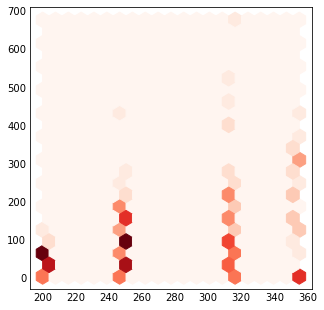

In [40]:
# plt.style.use('_mpl-gallery-nogrid')

# # make data: correlated + noise
# df = df_dataset3.copy(deep = True)
# x=df.iloc[:, 0]
# y=df.iloc[:, 3]/10000

# # plot:
# fig, ax = plt.subplots(figsize=(4,4))

# ax.hexbin(x, y, gridsize=20 , cmap = 'Reds')

# # ax.set(xlim=(-2, 2), ylim=(-3, 3))

# plt.show()

<Figure size 288x288 with 0 Axes>

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 288x288 with 0 Axes>

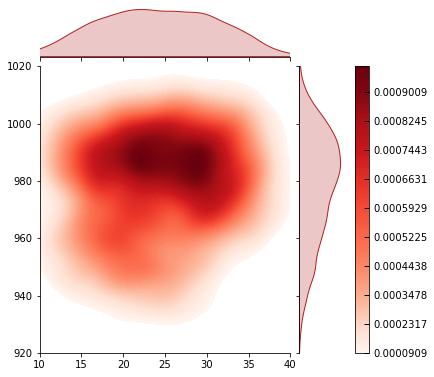

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x = np.random.normal(np.tile(np.random.uniform(15, 35, 10), 1000), 4)
y = np.random.normal(np.tile(np.random.uniform(940, 1000, 10), 1000), 10)
x = list(x)
y = list(y)
plt.figure(figsize =(4,4))

kdeplot = sns.jointplot(x, y, kind="kde", cbar=True, xlim=[10, 40], ylim=[920, 1020], fill = True, cmap= 'Reds',common_norm=False, levels = 100,color = 'firebrick')

plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
pos_joint_ax = kdeplot.ax_joint.get_position()
pos_marg_x_ax = kdeplot.ax_marg_x.get_position()
kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width,
                               pos_joint_ax.height])
kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])

# get the current colorbar ticks
cbar_ticks = kdeplot.fig.axes[-1].get_yticks()
# get the maximum value of the colorbar
_, cbar_max = kdeplot.fig.axes[-1].get_ylim()
# change the labels (not the ticks themselves) to a percentage
# kdeplot.fig.axes[-1].set_yticklabels([f'{t / cbar_max * 100:.1f} %' for t in cbar_ticks], fontsize = 18)
# kdeplot.fig.axes[-1].set_yticklabels(['9.3%','','','','54.6%','','','','','100%'], fontweight='normal',fontsize = 20, rotation = 90)
kdeplot.fig.axes[-1].tick_params(axis = 'y', which='major',length=5, width=1,top= False,right = True, direction = 'in')
# plt.savefig(f'./notebook_figures/Data/cbar.tiff',format='tiff', dpi=1200)
plt.show()

The following kwargs were not used by contour: 'kind'
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


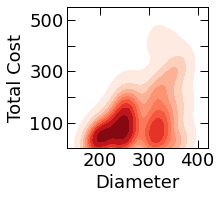

In [41]:
matplotlib.rcParams['axes.linewidth'] = 1
fig, axes = plt.subplots(figsize=(2,2)) #, sharey='row'
_=plt.subplots_adjust(
                     wspace=0.38, 
                    )

s=18

Y = ['',100,'',300,'',500]
# Y = [100, 300, 500]
hist_x = [0,0,250,500]
hist_y = [0,'',20,'',40,'',60]
upp_lim = 550
df = df_dataset3.copy(deep = True)
one, two, three = pearson(df)

kdeplot =sns.kdeplot(data=df, x=df.iloc[:, 0], y=df.iloc[:, 3]/10000, ax=axes, color = 'firebrick', kind='kde',cmap= 'Reds', fill=True, cbar= False, levels = 10)

_=axes.set_xlabel('Diameter' ,fontweight='normal', fontsize= s)
_=axes.set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes.set_ylabel('Total Cost' ,fontweight='normal', fontsize= s)
_=axes.tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes.tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes.tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes.set_xticklabels([0,200,300,400],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes.set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes.set_ylim(0,upp_lim)


# plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
# pos_joint_ax = kdeplot.ax_joint.get_position()
# pos_marg_x_ax = kdeplot.ax_marg_x.get_position()
# kdeplot.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width,
#                                pos_joint_ax.height])
# kdeplot.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])

# # cbar_ticks = kdeplot.fig.axes[-1].get_yticks()
# # get the maximum value of the colorbar
# _, cbar_max = kdeplot.fig.axes[-1].get_ylim()
# # change the labels (not the ticks themselves) to a percentage
# kdeplot.fig.axes[-1].set_yticklabels([f'{t / cbar_max * 100:.1f} %' for t in cbar_ticks], fontweight = 'normal', fontsize = s)

# plt.legend(legend_handles, legend_labels, title='Density', loc='upper right')
# plt.savefig(f'./notebook_figures/Data/cbar.tiff',format='tiff', dpi=1200)



FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


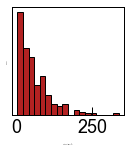

In [334]:
matplotlib.rcParams['axes.linewidth'] = 1
fig, axes = plt.subplots(figsize=(2,2)) #, sharey='row'
_=plt.subplots_adjust(
                     wspace=0.38, 
                    )

s=18

Y = ['',100,'',300,'',500]
hist_x = [0,0,250,500]
hist_y = [0,'',20,'',40,'',60]
upp_lim = 550
df = df_dataset3.copy(deep = True)
one, two, three = pearson(df)
_=axes.hist(df.iloc[:, 3]/10000, color = 'firebrick',bins= int(1+3.3*np.log(len(df.iloc[:, 3]))), ec='k')
_=axes.set_xlabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= 0)
_=axes.set_ylabel('Frequency' ,fontweight='normal', fontsize= 0)
_=axes.tick_params(axis = 'both', which='major',length=8, width=1,top= False ,right = False, direction = 'in')
_=axes.tick_params(axis = 'both', which='minor',length=0, width=1,top= False,right = False, direction = 'in')
_=axes.set_xticklabels(hist_x,rotation = 0, fontweight = 'normal', fontsize= s)
_=axes.set_yticklabels(hist_y,rotation = 0, fontweight = 'normal', fontsize= s)
plt.savefig(f'./notebook_figures/Schematic/d1.tiff',format='tiff', dpi=1200)

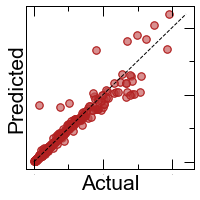

In [349]:
# Workstation code:
def testing4(testmodel,X_test,y_test):
    matplotlib.rcParams['axes.linewidth'] = 1
    style = 'normal'
    s = 22
    s1 = 17
    w =1
    test_pred = testmodel.predict(X_test)
    test_score=round((testmodel.score(X_test,y_test)),2)
    test_pred = test_pred/10000
    y_test = y_test/10000

    fig, ax = plt.subplots(figsize=(3,3))
    alpha = 0.5
    marker = 55

    minimum = 0
    maximum = 55
    _= plt.plot([minimum, maximum],[minimum, maximum], color = 'black', lw = 1, ls = '--', zorder= 10)

    #Test
    _= plt.scatter(y_test, test_pred,color = ['white'] , s = marker, linewidth = 1,edgecolors='firebrick', marker= 'o')
    _= plt.scatter(y_test, test_pred,color = ['firebrick'] , s=marker,alpha = alpha, marker = 'o',label='$R^{2}_{test}$='+str(test_score))

    X = [0,25,50]
    _= plt.xticks(X,X,rotation = 0, fontweight = style, fontsize = 0)#X,X_1,
    _= plt.yticks(X,X,rotation = 0, fontweight = style, fontsize = s)
    _= ax.tick_params('both', length=10, width=w, which='major',top= True ,right = True)
    _= ax.tick_params('both', length=5, width=w, which='minor',top= True,right = True)
    _= plt.xlabel('Actual', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    _= plt.ylabel('Predicted', fontsize= s-1, fontweight = 'normal', labelpad = 0)
    # _= plt.title('Cost ', fontsize= s-1, fontweight = 'normal')
    # plt.legend(prop= {'weight':'normal', 'size':s-2}, labelspacing=0.1, frameon= False,loc = 'lower right') #, loc = 'lower right' bbox_to_anchor=[0.95, 1]

    # testing inset
    # left, bottom, width, height = [0.16, 0.60, 0.30, 0.27]
    # ax2 = fig.add_axes([left, bottom, width, height])
    # p = np.array(test_pred) 
    # a = np.array(y_test)
    # std=np.std(p - a)
    # mean=np.mean(p - a)
    # xx=mean-2*std
    # yy = 0
    # y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    # rec = patches.Rectangle((xx,yy),4*std, np.max(y1), facecolor ='red', alpha = 0.16)
    # ax2.add_patch(rec)
    # _= plt.axvline(x = xx, color = 'red', lw =0.6, ls = '--')
    # _= plt.axvline(x = xx+4*std, color = 'red', lw =0.6, ls = '--')
    # y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='white',range = [-4*std, 4*std] )
    # y1,x,_ = ax2.hist(p - a, bins = int(1+3.3*np.log(len(p-a))) ,color='black',range = [-4*std, 4*std], alpha = 0.78)

    # ax2.set_ylim(0,np.max(y1))
    # ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
    # xlabel_ax2 = ax2.get_xticklabels()
    # ax2.yaxis.tick_right()
    # # ax2.yaxis.set_tick_params(labelsize =10,weight = 'normal')
    # # X = [-1.5,0,1.5]
    # _= plt.xticks(fontweight = style, fontsize = s1)
    # # _= plt.xticks(X,X,fontweight = style, fontsize = s1)
    # _= plt.yticks(fontweight = style, fontsize = s1)
    # _= ax2.xaxis.set_tick_params(labelsize =s1)  #11.8
    # # _= ax2.yaxis.set_tick_params(labelsize =12)
    # _= ax2.tick_params('both', length=10, width=w, which='major')
    # _= ax2.tick_params('both', length=5, width=w, which='minor')
    # ax2.yaxis.set_label_position("right")
    # # ax2.set_ylabel('\u03BD',fontsize=s1, fontweight = style, labelpad = 0)
    # ax2.set_xlabel(r'$\epsilon$',fontsize=s1, fontweight = style, labelpad = 0)
    plt.savefig(f'./notebook_figures/Schematic/parity.tiff',format='tiff', dpi=1200)
    _=plt.show()

testing4(xgboostmodel,Xdataset4_test,ydataset4_test)


# Data visualiztion (pair plots)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


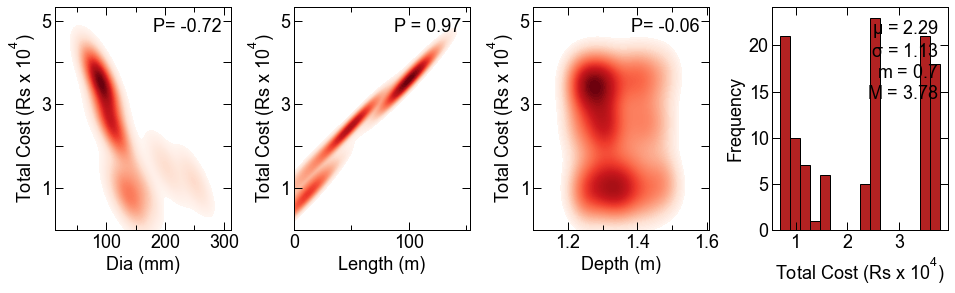

In [39]:
matplotlib.rcParams['axes.linewidth'] = 1
fig, axes = plt.subplots(1, 4, figsize=(16, 4.1)) #, sharey='row'
_=plt.subplots_adjust(
                     wspace=0.36, 
                    )

s=18
Y = ['',1,'',3,'',5]
hist_x = [0,1,2,3]
hist_y = [0,5,10,15,20]
df = df_dataset1.copy(deep = True)
one, two, three = pearson(df)
_=sns.kdeplot(data=df, x=df.iloc[:, 0], y=df.iloc[:, 3]/10000, ax=axes[0], color = 'firebrick', cmap= 'Reds', fill = True , levels =100)
_=axes[0].set_xlabel('Dia (mm)' ,fontweight='normal', fontsize= s)
_=axes[0].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[0].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[0].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[0].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[0].set_xticklabels([0,100,200,300],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[0].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[0].set_ylim(0,)
_= axes[0].text(0.95, 0.95, r'P= '+f'{one}', transform=axes[0].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=sns.kdeplot(data=df, x=df.iloc[:, 1], y=df.iloc[:, 3]/10000, ax=axes[1], color = 'firebrick', cmap= 'Reds', fill = True, levels =100)
_=axes[1].set_xlabel('Length (m)' ,fontweight='normal', fontsize= s)
_=axes[1].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[1].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[1].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[1].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[1].set_xticklabels([0,100],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[1].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[1].set_ylim(0,)
_= axes[1].set_xlim(0,)
_= axes[1].text(0.95, 0.95, r'P = '+f'{two}', transform=axes[1].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=sns.kdeplot(data=df, x=df.iloc[:, 2], y=df.iloc[:, 3]/10000, ax=axes[2], color = 'firebrick', cmap= 'Reds', fill = True, levels =100)
_=axes[2].set_xlabel('Depth (m)' ,fontweight='normal', fontsize= s)
_=axes[2].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[2].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[2].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[2].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[2].set_xticklabels([0,1.2,1.4,1.6],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[2].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[2].set_ylim(0,)
_= axes[2].text(0.95, 0.95, r'P= '+f'{three}', transform=axes[2].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=axes[3].hist(df.iloc[:, 3]/10000, color = 'firebrick',bins= int(1+3.3*np.log(len(df.iloc[:, 3]))), ec='k')
_=axes[3].set_xlabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[3].set_ylabel('Frequency' ,fontweight='normal', fontsize= s)
_=axes[3].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[3].tick_params(axis = 'both', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[3].set_xticklabels(hist_x,rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[3].set_yticklabels(hist_y,rotation = 0, fontweight = 'normal', fontsize= s)
mean, std, min, max = stats(df)
_= axes[3].text(0.95, 0.95, f'$\mu$ = {mean}\n$\sigma$ = {std}\n$m$ = {min}\n$M$ = {max}', transform=axes[3].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')
plt.savefig(f'./notebook_figures/Data/d1.tiff',format='tiff', dpi=1200)
plt.show()


FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


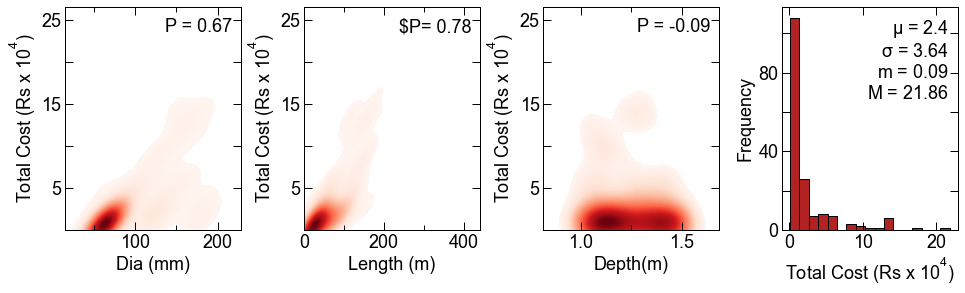

In [40]:
matplotlib.rcParams['axes.linewidth'] = 1
fig, axes = plt.subplots(1, 4, figsize=(16, 4.1)) #, sharey='row'
_=plt.subplots_adjust(
                     wspace=0.36, 
                    )

s=18
# Y = [0,'',10,'',20]
Y = ['',5,'',15,'',25]
hist_x = [0,0,10,20]
hist_y = [0,'',40,'',80,'']
df = df_dataset2.copy(deep = True)
one, two, three = pearson(df)
_=sns.kdeplot(data=df, x=df.iloc[:, 0], y=df.iloc[:, 3]/10000, ax=axes[0], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[0].set_xlabel('Dia (mm)' ,fontweight='normal', fontsize= s)
_=axes[0].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[0].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[0].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[0].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[0].set_xticklabels([0,100,200],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[0].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[0].set_ylim(0,)
_= axes[0].text(0.95, 0.95, r'P = '+f'{one}', transform=axes[0].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=sns.kdeplot(data=df, x=df.iloc[:, 1], y=df.iloc[:, 3]/10000, ax=axes[1], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[1].set_xlabel('Length (m)' ,fontweight='normal', fontsize= s)
_=axes[1].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[1].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[1].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[1].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[1].set_xticklabels([0,200, 400],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[1].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[1].set_ylim(0,)
_= axes[1].set_xlim(0,)
_= axes[1].text(0.95, 0.95, r'$P= '+f'{two}', transform=axes[1].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=sns.kdeplot(data=df, x=df.iloc[:, 2], y=df.iloc[:, 3]/10000, ax=axes[2], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[2].set_xlabel('Depth(m)' ,fontweight='normal', fontsize= s)
_=axes[2].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[2].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[2].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[2].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[2].set_xticklabels([0,1.0,1.5],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[2].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[2].set_ylim(0,)
_= axes[2].text(0.95, 0.95, r'P = '+f'{three}', transform=axes[2].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=axes[3].hist(df.iloc[:, 3]/10000, color = 'firebrick',bins= int(1+3.3*np.log(len(df.iloc[:, 3]))), ec='k')
_=axes[3].set_xlabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[3].set_ylabel('Frequency' ,fontweight='normal', fontsize= s)
_=axes[3].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[3].tick_params(axis = 'both', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[3].set_xticklabels(hist_x,rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[3].set_yticklabels(hist_y,rotation = 0, fontweight = 'normal', fontsize= s)
mean, std, min, max = stats(df)
_= axes[3].text(0.95, 0.95, f'$\mu$ = {mean}\n$\sigma$ = {std}\n$m$ = {min}\n$M$ = {max}', transform=axes[3].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')
plt.savefig(f'./notebook_figures/Data/d2.tiff',format='tiff', dpi=1200)
plt.show()

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


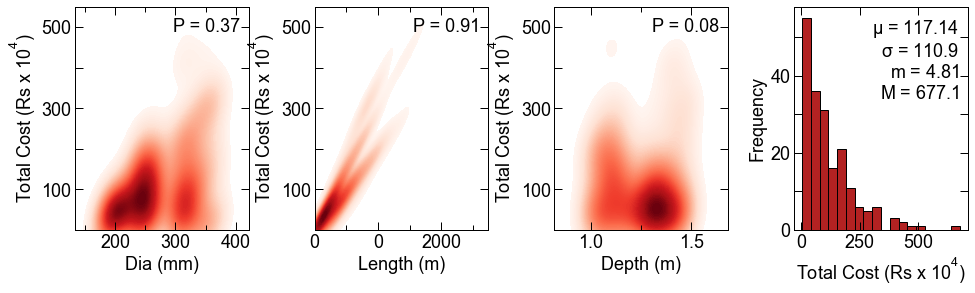

In [41]:
matplotlib.rcParams['axes.linewidth'] = 1
fig, axes = plt.subplots(1, 4, figsize=(16, 4.1)) #, sharey='row'
_=plt.subplots_adjust(
                     wspace=0.38, 
                    )

s=18

Y = ['',100,'',300,'',500]
hist_x = [0,0,250,500]
hist_y = [0,'',20,'',40,'',60]
upp_lim = 550
df = df_dataset3.copy(deep = True)
one, two, three = pearson(df)

_=sns.kdeplot(data=df, x=df.iloc[:, 0], y=df.iloc[:, 3]/10000, ax=axes[0], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[0].set_xlabel('Dia (mm)' ,fontweight='normal', fontsize= s)
_=axes[0].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[0].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[0].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[0].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[0].set_xticklabels([0,200,300,400],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[0].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[0].set_ylim(0,upp_lim)
_= axes[0].text(0.95, 0.95, r'P = '+f'{one}', transform=axes[0].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=sns.kdeplot(data=df, x=df.iloc[:, 1], y=df.iloc[:, 3]/10000, ax=axes[1], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[1].set_xlabel('Length (m)' ,fontweight='normal', fontsize= s)
_=axes[1].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[1].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[1].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[1].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[1].set_xticklabels([0,0,2000],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[1].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[1].set_ylim(0,upp_lim)
_= axes[1].set_xlim(0,)
_= axes[1].text(0.95, 0.95, r'P = '+f'{two}', transform=axes[1].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=sns.kdeplot(data=df, x=df.iloc[:, 2], y=df.iloc[:, 3]/10000, ax=axes[2], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[2].set_xlabel('Depth (m)' ,fontweight='normal', fontsize= s)
_=axes[2].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[2].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[2].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[2].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[2].set_xticklabels([0,1.0,1.5],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[2].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[2].set_ylim(0,upp_lim)
_= axes[2].text(0.95, 0.95, r'P = '+f'{three}', transform=axes[2].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=axes[3].hist(df.iloc[:, 3]/10000, color = 'firebrick',bins= int(1+3.3*np.log(len(df.iloc[:, 3]))), ec='k')
_=axes[3].set_xlabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[3].set_ylabel('Frequency' ,fontweight='normal', fontsize= s)
_=axes[3].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[3].tick_params(axis = 'both', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[3].set_xticklabels(hist_x,rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[3].set_yticklabels(hist_y,rotation = 0, fontweight = 'normal', fontsize= s)
mean, std, min, max = stats(df)
_= axes[3].text(0.95, 0.95, f'$\mu$ = {mean}\n$\sigma$ = {std}\n$m$ = {min}\n$M$ = {max}', transform=axes[3].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')
plt.savefig(f'./notebook_figures/Data/d3.tiff',format='tiff', dpi=1200)
plt.show()

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


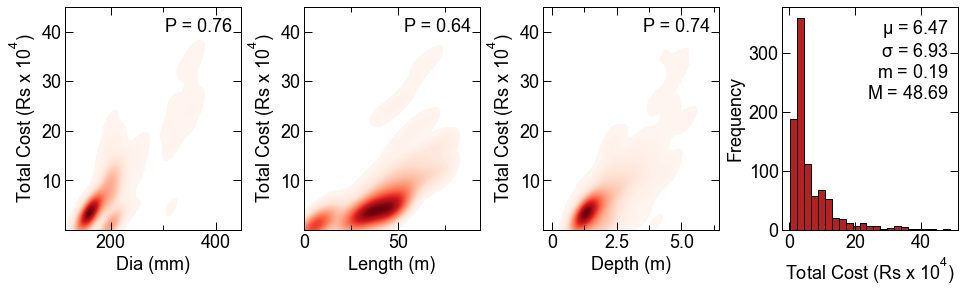

In [42]:
matplotlib.rcParams['axes.linewidth'] = 1
fig, axes = plt.subplots(1, 4, figsize=(16, 4.1)) #, sharey='row'
_=plt.subplots_adjust(
                     wspace=0.36, 
                    )

s=18

Y = ['',10,20,30,40]
hist_x = [0,0,20,40]
hist_y = [0,100,200,300]
upp_lim = 45
df = df_dataset4.copy(deep = True)
one, two, three = pearson(df)

_=sns.kdeplot(data=df, x=df.iloc[:, 0], y=df.iloc[:, 3]/10000, ax=axes[0], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[0].set_xlabel('Dia (mm)' ,fontweight='normal', fontsize= s)
_=axes[0].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[0].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[0].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[0].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[0].set_xticklabels([0,200,400],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[0].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[0].set_ylim(0,upp_lim)
_= axes[0].text(0.95, 0.95, r'P = '+f'{one}', transform=axes[0].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=sns.kdeplot(data=df, x=df.iloc[:, 1], y=df.iloc[:, 3]/10000, ax=axes[1], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[1].set_xlabel('Length (m)' ,fontweight='normal', fontsize= s)
_=axes[1].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[1].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[1].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[1].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[1].set_xticklabels([0,50],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[1].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[1].set_ylim(0,upp_lim)
_= axes[1].set_xlim(0,)
_= axes[1].text(0.95, 0.95, r'P = '+f'{two}', transform=axes[1].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=sns.kdeplot(data=df, x=df.iloc[:, 2], y=df.iloc[:, 3]/10000, ax=axes[2], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[2].set_xlabel('Depth (m)' ,fontweight='normal', fontsize= s)
_=axes[2].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[2].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[2].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[2].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[2].set_xticklabels([0, 0,2.5,5.0],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[2].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[2].set_ylim(0,upp_lim)
_= axes[2].text(0.95, 0.95, r'P = '+f'{three}', transform=axes[2].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=axes[3].hist(df.iloc[:, 3]/10000, color = 'firebrick',bins= int(1+3.3*np.log(len(df.iloc[:, 3]))), ec='k')
_=axes[3].set_xlabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[3].set_ylabel('Frequency' ,fontweight='normal', fontsize= s)
_=axes[3].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[3].tick_params(axis = 'both', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[3].set_xticklabels(hist_x,rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[3].set_yticklabels(hist_y,rotation = 0, fontweight = 'normal', fontsize= s)
mean, std, min, max = stats(df)
_= axes[3].text(0.95, 0.95, f'$\mu$ = {mean}\n$\sigma$ = {std}\n$m$ = {min}\n$M$ = {max}', transform=axes[3].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')
plt.savefig(f'./notebook_figures/Data/d4.tiff',format='tiff', dpi=1200)
plt.show()

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


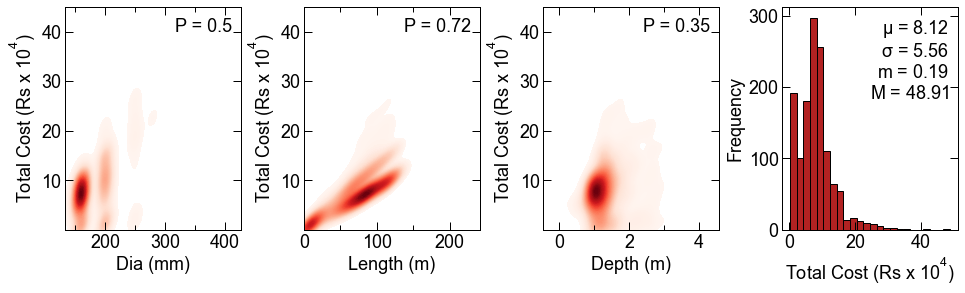

In [43]:
matplotlib.rcParams['axes.linewidth'] = 1
fig, axes = plt.subplots(1, 4, figsize=(16, 4.1)) #, sharey='row'
_=plt.subplots_adjust(
                     wspace=0.36, 
                    )

s=18

Y = ['',10,20,30,40]
hist_x = [0,0,20,40]
hist_y = [0,100,200,300]
upp_lim = 45
df = df_dataset5.copy(deep = True)
one, two, three = pearson(df)

_=sns.kdeplot(data=df, x=df.iloc[:, 0], y=df.iloc[:, 3]/10000, ax=axes[0], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[0].set_xlabel('Dia (mm)' ,fontweight='normal', fontsize= s)
_=axes[0].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[0].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[0].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[0].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[0].set_xticklabels([0,200,300,400],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[0].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[0].set_ylim(0,upp_lim)
_= axes[0].text(0.95, 0.95, r'P = '+f'{one}', transform=axes[0].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=sns.kdeplot(data=df, x=df.iloc[:, 1], y=df.iloc[:, 3]/10000, ax=axes[1], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[1].set_xlabel('Length (m)' ,fontweight='normal', fontsize= s)
_=axes[1].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[1].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[1].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[1].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[1].set_xticklabels([0,100,200],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[1].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[1].set_ylim(0,upp_lim)
_= axes[1].set_xlim(0,)
_= axes[1].text(0.95, 0.95, r'P = '+f'{two}', transform=axes[1].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=sns.kdeplot(data=df, x=df.iloc[:, 2], y=df.iloc[:, 3]/10000, ax=axes[2], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[2].set_xlabel('Depth (m)' ,fontweight='normal', fontsize= s)
_=axes[2].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[2].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[2].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[2].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[2].set_xticklabels([0,0,2,4],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[2].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[2].set_ylim(0,upp_lim)
_= axes[2].text(0.95, 0.95, r'P = '+f'{three}', transform=axes[2].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=axes[3].hist(df.iloc[:, 3]/10000, color = 'firebrick',bins= int(1+3.3*np.log(len(df.iloc[:, 3]))), ec='k')
_=axes[3].set_xlabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[3].set_ylabel('Frequency' ,fontweight='normal', fontsize= s)
_=axes[3].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[3].tick_params(axis = 'both', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[3].set_xticklabels(hist_x,rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[3].set_yticklabels(hist_y,rotation = 0, fontweight = 'normal', fontsize= s)
mean, std, min, max = stats(df)
_= axes[3].text(0.95, 0.95, f'$\mu$ = {mean}\n$\sigma$ = {std}\n$m$ = {min}\n$M$ = {max}', transform=axes[3].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')
plt.savefig(f'./notebook_figures/Data/d5.tiff',format='tiff', dpi=1200)
plt.show()

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


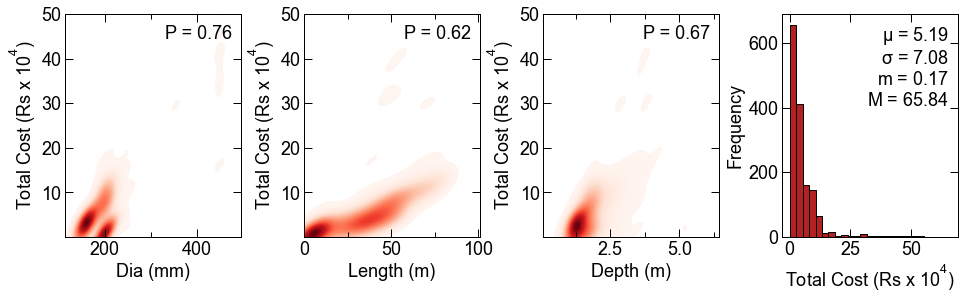

In [44]:
matplotlib.rcParams['axes.linewidth'] = 1
fig, axes = plt.subplots(1, 4, figsize=(16, 4.1)) #, sharey='row'
_=plt.subplots_adjust(
                     wspace=0.36, 
                    )

s=18

Y = ['',10, 20,30,40,50]
hist_x = [0,0,25,50]
hist_y = [0,200,400,600]
upp_lim = 50
df = df_dataset6.copy(deep = True)
one, two, three = pearson(df)

_=sns.kdeplot(data=df, x=df.iloc[:, 0], y=df.iloc[:, 3]/10000, ax=axes[0], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[0].set_xlabel('Dia (mm)' ,fontweight='normal', fontsize= s)
_=axes[0].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[0].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[0].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[0].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[0].set_xticklabels([0,200,400],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[0].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[0].set_ylim(0,upp_lim)
_= axes[0].text(0.95, 0.95, r'P = '+f'{one}', transform=axes[0].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')


_=sns.kdeplot(data=df, x=df.iloc[:, 1], y=df.iloc[:, 3]/10000, ax=axes[1], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[1].set_xlabel('Length (m)' ,fontweight='normal', fontsize= s)
_=axes[1].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[1].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[1].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[1].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[1].set_xticklabels([0,50,100],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[1].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[1].set_ylim(0,upp_lim)
_= axes[1].set_xlim(0,)
_= axes[1].text(0.95, 0.95, r'P = '+f'{two}', transform=axes[1].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=sns.kdeplot(data=df, x=df.iloc[:, 2], y=df.iloc[:, 3]/10000, ax=axes[2], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[2].set_xlabel('Depth (m)' ,fontweight='normal', fontsize= s)
_=axes[2].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[2].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[2].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[2].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[2].set_xticklabels([0,2.5,5.0],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[2].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[2].set_ylim(0,upp_lim)
_= axes[2].text(0.95, 0.95, r'P = '+f'{three}', transform=axes[2].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=axes[3].hist(df.iloc[:, 3]/10000, color = 'firebrick',bins= int(1+3.3*np.log(len(df.iloc[:, 3]))), ec='k')
_=axes[3].set_xlabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[3].set_ylabel('Frequency' ,fontweight='normal', fontsize= s)
_=axes[3].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[3].tick_params(axis = 'both', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[3].set_xticklabels(hist_x,rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[3].set_yticklabels(hist_y,rotation = 0, fontweight = 'normal', fontsize= s)
mean, std, min, max = stats(df)
_= axes[3].text(0.95, 0.95, f'$\mu$ = {mean}\n$\sigma$ = {std}\n$m$ = {min}\n$M$ = {max}', transform=axes[3].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')
plt.savefig(f'./notebook_figures/Data/d6.tiff',format='tiff', dpi=1200)
plt.show()

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


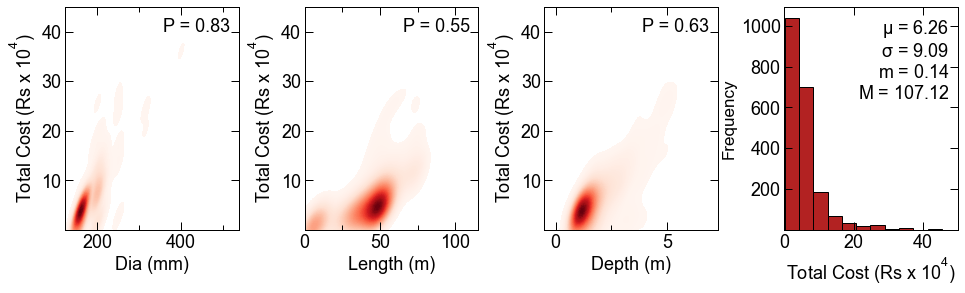

In [45]:
matplotlib.rcParams['axes.linewidth'] = 1
fig, axes = plt.subplots(1, 4, figsize=(16, 4.1)) #, sharey='row'
_=plt.subplots_adjust(
                     wspace=0.38, 
                    )

s=18

Y = ['',10,20,30,40]
hist_x = [0,20,40]
hist_y = ['',200,400,600,800,1000]
upp_lim = 45
df = df_dataset7.copy(deep = True)
one, two, three = pearson(df)

_=sns.kdeplot(data=df, x=df.iloc[:, 0], y=df.iloc[:, 3]/10000, ax=axes[0], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[0].set_xlabel('Dia (mm)' ,fontweight='normal', fontsize= s)
_=axes[0].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[0].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[0].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[0].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[0].set_xticklabels([0,200,400],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[0].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[0].set_ylim(0,upp_lim)
_= axes[0].text(0.95, 0.95, r'P = '+f'{one}', transform=axes[0].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=sns.kdeplot(data=df, x=df.iloc[:, 1], y=df.iloc[:, 3]/10000, ax=axes[1], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[1].set_xlabel('Length (m)' ,fontweight='normal', fontsize= s)
_=axes[1].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[1].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[1].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[1].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[1].set_xticklabels([0,50,100],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[1].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[1].set_ylim(0,upp_lim)
_= axes[1].set_xlim(0,)
_= axes[1].text(0.95, 0.95, r'P = '+f'{two}', transform=axes[1].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=sns.kdeplot(data=df, x=df.iloc[:, 2], y=df.iloc[:, 3]/10000, ax=axes[2], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[2].set_xlabel('Depth (m)' ,fontweight='normal', fontsize= s)
_=axes[2].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[2].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[2].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[2].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[2].set_xticklabels([0,0,5],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[2].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[2].set_ylim(0,upp_lim)
_= axes[2].text(0.95, 0.95, r'P = '+f'{three}', transform=axes[2].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=axes[3].hist(df.iloc[:, 3]/10000, color = 'firebrick',bins= int(1+3.3*np.log(len(df.iloc[:, 3]))), ec='k')
_=axes[3].set_xlabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[3].set_ylabel('Frequency' ,fontweight='normal', fontsize= s-1)
_=axes[3].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[3].tick_params(axis = 'both', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[3].set_xticklabels(hist_x,rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[3].set_yticklabels(hist_y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[3].set_xlim(0,50)
mean, std, min, max = stats(df)
_= axes[3].text(0.95, 0.95, f'$\mu$ = {mean}\n$\sigma$ = {std}\n$m$ = {min}\n$M$ = {max}', transform=axes[3].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')
plt.savefig(f'./notebook_figures/Data/d7.tiff',format='tiff', dpi=1200)
plt.show()

In [ ]:
matplotlib.rcParams['axes.linewidth'] = 1
fig, axes = plt.subplots(1, 4, figsize=(16, 4.1)) #, sharey='row'
_=plt.subplots_adjust(
                     wspace=0.38, 
                    )

s=18

Y = ['',50,'',150,'',250]
hist_x = [0,100,200]
hist_y = ['',500,1000,1500,2000]
upp_lim = 270
df = df_dataset237.copy(deep = True)
one, two, three = pearson(df)

_=sns.kdeplot(data=df, x=df.iloc[:, 0], y=df.iloc[:, 3]/10000, ax=axes[0], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[0].set_xlabel('Dia (mm)' ,fontweight='normal', fontsize= s)
_=axes[0].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[0].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[0].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[0].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[0].set_xticklabels([0,200,400],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[0].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[0].set_ylim(0,upp_lim)
_= axes[0].text(0.95, 0.95, r'P = '+f'{one}', transform=axes[0].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=sns.kdeplot(data=df, x=df.iloc[:, 1], y=df.iloc[:, 3]/10000, ax=axes[1], color = 'firebrick', cmap= 'Reds', fill=True, levels =10)
_=axes[1].set_xlabel('Length (m)' ,fontweight='normal', fontsize= s)
_=axes[1].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[1].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[1].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[1].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[1].set_xticklabels([0,1000,2000],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[1].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[1].set_ylim(0,upp_lim)
_= axes[1].set_xlim(0,)
_= axes[1].text(0.95, 0.95, r'P = '+f'{two}', transform=axes[1].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=sns.kdeplot(data=df, x=df.iloc[:, 2], y=df.iloc[:, 3]/10000, ax=axes[2], color = 'firebrick', cmap= 'Reds', fill=True, levels =100)
_=axes[2].set_xlabel('Depth (m)' ,fontweight='normal', fontsize= s)
_=axes[2].set_ylabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[2].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[2].tick_params(axis = 'y', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[2].tick_params(axis = 'x', which='minor',length=5, width=1,top= True,right = True, direction = 'in')
_=axes[2].set_xticklabels([0,0,5],rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[2].set_yticklabels(Y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[2].set_ylim(0,upp_lim)
_= axes[2].text(0.95, 0.95, r'P = '+f'{three}', transform=axes[2].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')

_=axes[3].hist(df.iloc[:, 3]/10000, color = 'firebrick',bins= int(1+3.3*np.log(len(df.iloc[:, 3]))), ec='k')
_=axes[3].set_xlabel('Total Cost (Rs x $10^{4}$)' ,fontweight='normal', fontsize= s)
_=axes[3].set_ylabel('Frequency' ,fontweight='normal', fontsize= s-1)
_=axes[3].tick_params(axis = 'both', which='major',length=8, width=1,top= True ,right = True, direction = 'in')
_=axes[3].tick_params(axis = 'both', which='minor',length=0, width=1,top= True,right = True, direction = 'in')
_=axes[3].set_xticklabels(hist_x,rotation = 0, fontweight = 'normal', fontsize= s)
_=axes[3].set_yticklabels(hist_y,rotation = 0, fontweight = 'normal', fontsize= s)
_= axes[3].set_xlim(0,260)
mean, std, min, max = stats(df)
_= axes[3].text(0.95, 0.95, f'$\mu$ = {mean}\n$\sigma$ = {std}\n$m$ = {min}\n$M$ = {max}', transform=axes[3].transAxes, fontsize=s, va='top', ha='right', fontweight ='normal')
plt.savefig(f'./notebook_figures/Data/d8.tiff',format='tiff', dpi=1200)
plt.show()

# Combining data to form Training set

In [ ]:
from sklearn.model_selection import train_test_split

Xdataset1_train=Xdataset237
ydataset1_train=ydataset237
Xdataset1_test=Xdataset1
ydataset1_test=ydataset1
Xdataset2_test=Xdataset2
ydataset2_test=ydataset2
Xdataset3_test=Xdataset3
ydataset3_test=ydataset3
Xdataset4_test=Xdataset4
ydataset4_test=ydataset4
Xdataset5_test=Xdataset5
ydataset5_test=ydataset5
Xdataset6_test=Xdataset6
ydataset6_test=ydataset6
Xdataset7_test=Xdataset7
ydataset7_test=ydataset7
Xdataset_train, Xdataset_temp, ydataset_train, ydataset_temp = train_test_split(Xdataset1_train, ydataset1_train, test_size=0.3, random_state=42)
Xdataset_val, Xdataset_test, ydataset_val, ydataset_test = train_test_split(Xdataset_temp, ydataset_temp, test_size=0.66, random_state=42)


X_train=Xdataset_train
y_train=ydataset_train
X_val=Xdataset_val
y_val=ydataset_val
X_test=Xdataset_test
y_test=ydataset_test

# Training models on combining data

In [33]:
#Linear Regression

def linearregression(X_train,y_train,X_val,y_val,X_test,y_test):
    model_lin=LinearRegression(n_jobs=1, positive=False)  
    model_lin.fit(X_train,y_train)
    rscore=model_lin.score(X_train,y_train)
    rscoretrain=round((model_lin.score(X_train,y_train)),2)
    print("R-squared score Train: ", rscoretrain)
    rscoreval=round((model_lin.score(X_val,y_val)),2)
    print("R-squared score Validation: ", rscoreval)
    rscoretest=round((model_lin.score(X_test,y_test)),2)
    print("R-squared score Test: ", rscoretest)
    ypredicted = model_lin.predict(X_test)
    yactual = y_test

    # Fit regression line
    coef = np.polyfit(ypredicted, yactual, 1)
    poly1d_fn = np.poly1d(coef)
    # Add regression line
   


    # Plotting the scatter plot
    plt.scatter(y_train, y_train, color='dodgerblue', marker='^',alpha=0.7, label='R² Training= '+str(rscoretrain))
    plt.scatter(ypredicted, yactual, color='deeppink', marker='^',alpha=0.7, label='R² Test= '+str(rscoretest))
    
    # Adding labels and title to the plot
    plt.xlabel('Predicted Cost')
    plt.ylabel('Actual Cost')
    plt.title('Linear Regression')
    plt.legend()
    plt.xlim(0,50000)
    plt.ylim(0,50000)
    plt.show()

   # Fits the explainer
    explainer = shap.Explainer(model_lin.predict, X_train)
    # Calculates the SHAP values - It takes some time
    shap_values = explainer(X_train)
    # Evaluate SHAP values
    #shap_values = explainer.shap_values(X)
    # shap.plots.bar(shap_values)

    return (model_lin, shap_values)

In [ ]:
linearmodel, shap_values =linearregression(X_train,y_train,X_val,y_val,X_test,y_test)

In [ ]:
sz = 18

new_captions = ['Length', 'Dia', 'Average Depth']

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True

_= shap.summary_plot(shap_values,show = False, 
                plot_type='bar',
                max_display = 15,
                color_bar = False,
                color= "red",
                feature_names = new_captions,
                features = X_test,      #Changed from X_train to X_test_scx as we are explaining all the predictions in test set
                plot_size=[10,4]  # Change this size as per requirement
                )
_= plt.ylabel('Features', fontsize = sz, fontweight = 'normal')
fig=plt.gca()


_= fig.spines['top'].set_visible(True) 
_= fig.spines['right'].set_visible(True)
_= fig.spines['left'].set_visible(True)

visible_ticks = {
"top": True,
}
_= plt.tick_params(axis="x", which="both", **visible_ticks)
_= plt.tick_params(axis="y", which="both", **visible_ticks)
_= plt.tick_params(axis="y", which="major", direction = 'in', left = True)
_= plt.tick_params(axis="y", which="major", direction = 'in', right = True) #mean(|SHAP value|) (wt. %)
_= plt.xlabel('mean(|SHAP value|)\n(wt. %)', fontsize= sz, fontweight= 'normal')
# X= [0,0.8,1.6]
_= plt.xticks(fontsize = sz, fontweight= 'normal')
_= plt.yticks(fontsize = sz, fontweight= 'normal')
_= plt.tick_params(which = 'major', width= 1, length =6)
_= plt.tick_params(which = 'minor', width= 1, length =3)
# plt.yaxis.tick_right()
# plt.savefig('/Users/sheikhjunaidfayaz/Documents/Papers/Innovandi/Phase_prediction/Figures/shapbaralite.tiff',format='tiff', dpi=1200)
plt.show()

In [28]:
def lassoregression(X_train,y_train,X_val,y_val,X_test,y_test,alpha):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    rscoretrain=round((lasso.score(X_train,y_train)),2)
    rscoreval=round((lasso.score(X_val,y_val)),2)
    rscoretest=round((lasso.score(X_test,y_test)),2)
    print("R-squared score Train: ", rscoretrain)
    print("R-squared score Validation: ", rscoreval)
    print("R-squared score Test: ", rscoretest)
    ypredicted = lasso.predict(X_test)
    yactual = y_test

    # Fit regression line
    coef = np.polyfit(ypredicted, yactual, 1)
    poly1d_fn = np.poly1d(coef)
   

    # Plotting the scatter plot
    plt.scatter(y_train, y_train, color='dodgerblue', marker='^',alpha=0.7, label='R² Training= '+str(rscoretrain))
    plt.scatter(ypredicted, yactual, color='deeppink', marker='^',alpha=0.7, label='R² Test= '+str(rscoretest))
    
    # Adding labels and title to the plot
    plt.xlabel('Predicted Cost')
    plt.ylabel('Actual Cost')
    plt.title('Lasso Regression')
    plt.legend()
    plt.xlim(0,50000)
    plt.ylim(0,50000)
    plt.show()

    # Fits the explainer
    explainer = shap.Explainer(lasso.predict, X_train)
    # Calculates the SHAP values - It takes some time
    shap_values = explainer(X_train)
    # Evaluate SHAP values
    #shap_values = explainer.shap_values(X)
    shap.plots.bar(shap_values)
    return(lasso)

In [30]:
# Elastic-Net Regression
from sklearn.linear_model import ElasticNet
def elasticnetregression(X_train,y_train,X_val,y_val,X_test,y_test,alpha,l1_ratio):
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    elasticnet.fit(X_train, y_train)
    rscoretrain=round((elasticnet.score(X_train,y_train)),2)
    rscoreval=round((elasticnet.score(X_val,y_val)),2)
    rscoretest=round((elasticnet.score(X_test,y_test)),2)
    print("R-squared score Train: ", rscoretrain)
    print("R-squared score Validation: ", rscoreval)
    print("R-squared score Test: ", rscoretest)
    ypredicted = elasticnet.predict(X_test)
    yactual = y_test

    # Fit regression line
    coef = np.polyfit(ypredicted, yactual, 1)
    poly1d_fn = np.poly1d(coef)


    # Plotting the scatter plot
    plt.scatter(y_train, y_train, color='dodgerblue', marker='^',alpha=0.7, label='R² Training= '+str(rscoretrain))
    plt.scatter(ypredicted, yactual, color='deeppink', marker='^',alpha=0.7, label='R² Test= '+str(rscoretest))
    
   # Adding labels and title to the plot
    plt.xlabel('Predicted Cost')
    plt.ylabel('Actual Cost')
    plt.title('Elastic-Net Regression')
    plt.legend()
    plt.xlim(0,50000)
    plt.ylim(0,50000)
    plt.show()

    # Fits the explainer
    explainer = shap.Explainer(elasticnet.predict, X_train)
    # Calculates the SHAP values - It takes some time
    shap_values = explainer(X_train)
    # Evaluate SHAP values
    #shap_values = explainer.shap_values(X)
    shap.plots.bar(shap_values)
    return (elasticnet)

R-squared score Train:  0.91
R-squared score Validation:  0.92
R-squared score Test:  0.92


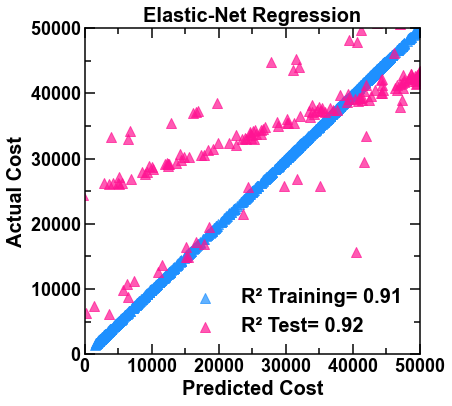

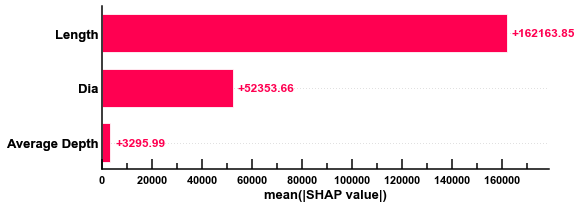

In [31]:

elasticnetmodel=elasticnetregression(X_train,y_train,X_val,y_val,X_test,y_test,alpha=0.01,l1_ratio=0.6)


In [32]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
def randomforest(X_train,y_train,X_val,y_val,X_test,y_test):
    rf_regressor = RandomForestRegressor(n_estimators=5, max_depth=10, random_state=20)
    rf_regressor.fit(X_train, y_train)
    rscoretrain=round((rf_regressor.score(X_train,y_train)),2)
    rscoreval=round((rf_regressor.score(X_val,y_val)),2)
    rscoretest=round((rf_regressor.score(X_test,y_test)),2)
    print("R-squared score Train: ", rscoretrain)
    print("R-squared score Validation: ", rscoreval)
    print("R-squared score Test: ", rscoretest)
    ypredicted = rf_regressor.predict(X_test)
    yactual = y_test

    # Fit regression line
    coef = np.polyfit(ypredicted, yactual, 1)
    poly1d_fn = np.poly1d(coef)


    # Plotting the scatter plot
    plt.scatter(y_train, y_train, color='dodgerblue', marker='^',alpha=0.7, label='R² Training= '+str(rscoretrain))
    plt.scatter(ypredicted, yactual, color='deeppink', marker='^',alpha=0.7, label='R² Test= '+str(rscoretest))
    
    # Adding labels and title to the plot
    plt.xlabel('Predicted Cost')
    plt.ylabel('Actual Cost')
    plt.title('Random Forest Regression')
    plt.legend()
    plt.xlim(0,50000)
    plt.ylim(0,50000)
    plt.show()

    # Fits the explainer
    explainer = shap.Explainer(rf_regressor.predict, X_train)
    # Calculates the SHAP values - It takes some time
    shap_values = explainer(X_train)
    # Evaluate SHAP values
    #shap_values = explainer.shap_values(X)
    shap.plots.bar(shap_values)
    return(rf_regressor)

R-squared score Train:  0.99
R-squared score Validation:  0.97
R-squared score Test:  0.94


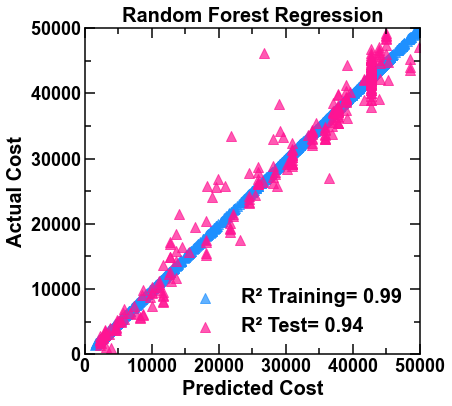

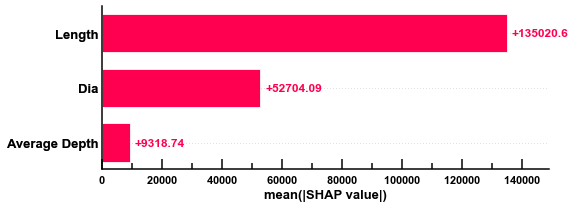

In [33]:

randomforestmodel=randomforest(X_train,y_train,X_val,y_val,X_test,y_test)


# Training XGBoost

In [216]:
#XG Boost
import xgboost as xgb
from sklearn.metrics import r2_score
def xgboostregressor(X_train,y_train,X_val,y_val,X_test,y_test):
    xgb_model=xgb.XGBRegressor(random_state=42)
    xgb_model.fit(X_train, y_train)
    rscoretrain=round((xgb_model.score(X_train,y_train)),2)
    rscoreval=round((xgb_model.score(X_val,y_val)),2)
    rscoretest=round((xgb_model.score(X_test,y_test)),2)
    print("R-squared score Train: ", rscoretrain)
    print("R-squared score Validation: ", rscoreval)
    print("R-squared score Test: ", rscoretest)
    ypredicted = xgb_model.predict(X_test)
    yactual = y_test

    # Fit regression line
    coef = np.polyfit(ypredicted, yactual, 1)
    poly1d_fn = np.poly1d(coef)


    # Plotting the scatter plot
    plt.scatter(y_train, y_train, color='dodgerblue', marker='^',alpha=0.7, label='R² Training= '+str(rscoretrain))
    plt.scatter(ypredicted, yactual, color='deeppink', marker='^',alpha=0.7, label='R² Test= '+str(rscoretest))
    
    # Adding labels and title to the plot
    plt.xlabel('Predicted Cost')
    plt.ylabel('Actual Cost')
    plt.title('XG Boost Regression')
    plt.legend()
    plt.xlim(0,250000)
    plt.ylim(0,250000)
    plt.show()

    # Fits the explainer
    explainer = shap.Explainer(xgb_model.predict, X_train)
    # Calculates the SHAP values - It takes some time
    shap_values = explainer(X_train)
    # Evaluate SHAP values
    #shap_values = explainer.shap_values(X)
    shap.plots.bar(shap_values)
    return(xgb_model)

R-squared score Train:  1.0
R-squared score Validation:  0.96
R-squared score Test:  0.92


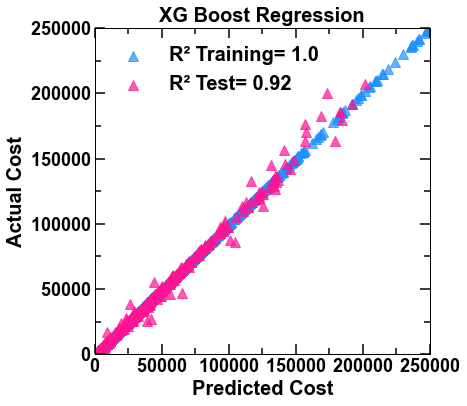

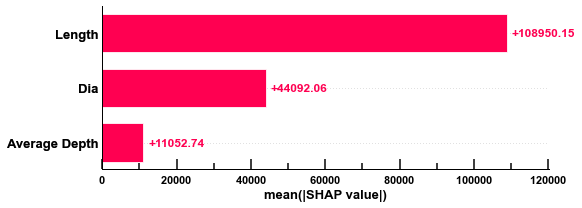

In [217]:
xgboostmodel=xgboostregressor(X_train,y_train,X_val,y_val,X_test,y_test)


In [218]:
explainer = shap.TreeExplainer(xgboostmodel)
shap_values_Xgboost = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


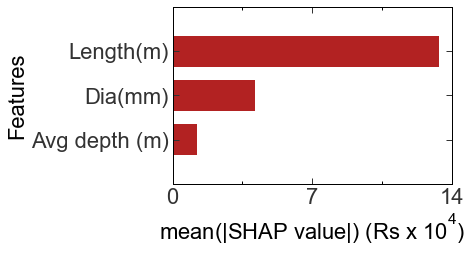

In [250]:
explainer = shap.TreeExplainer(xgboostmodel)
shap_values_Xgboost = explainer.shap_values(X_train)
s = 22

new_captions = ['Dia(mm)', 'Length(m)', 'Avg depth (m)']

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True

_= shap.summary_plot(shap_values_Xgboost,show = False, 
                plot_type='bar',
                color_bar = False,
                color= "firebrick",
                feature_names = new_captions,
                features = X_train,      #Changed from X_train to X_test_scx as we are explaining all the predictions in test set
                plot_size=[6,3.5]  # Change this size as per requirement
                )
_= plt.ylabel('Features', fontsize = s, fontweight = 'normal')
fig=plt.gca()



_= fig.spines['top'].set_visible(True) 
_= fig.spines['right'].set_visible(True)
_= fig.spines['left'].set_visible(True)

visible_ticks = {
"top": True,
}
_= plt.tick_params(axis="x", which="both", **visible_ticks)
_= plt.tick_params(axis="y", which="both", **visible_ticks)
_= plt.tick_params(axis="y", which="major", direction = 'in', left = True)
_= plt.tick_params(axis="y", which="major", direction = 'in', right = True) #mean(|SHAP value|) (wt. %)
_= plt.xlabel('mean(|SHAP value|) (Rs x $10^{4}$)', fontsize= s, fontweight= 'normal')
X= [0,7,14]
X1 = [1, 70000, 140000]
_= plt.xticks(X1,X,fontsize = s, fontweight= 'normal')
_= plt.yticks(fontsize = s, fontweight= 'normal')
_= plt.tick_params(which = 'major', width= 1, length =6)
_= plt.tick_params(which = 'minor', width= 1, length =3)
# plt.yaxis.tick_right()
plt.savefig('./notebook_figures/shap_xgb_training.tiff',format='tiff', dpi=1200)
plt.show()

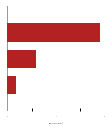

In [307]:
# explainer = shap.TreeExplainer(xgboostmodel)
# shap_values_Xgboost = explainer.shap_values(X_train)
# s = 22

# new_captions = ['Dia(mm)', 'Length(m)', 'Avg depth (m)']

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

_= shap.summary_plot(shap_values_Xgboost,show = False, 
                plot_type='bar',
                color_bar = False,
                color= "firebrick",
                feature_names = new_captions,
                features = X_train,      #Changed from X_train to X_test_scx as we are explaining all the predictions in test set
                plot_size=[2,2.5]  # Change this size as per requirement
                )
# _= plt.ylabel('Features', fontsize = s, fontweight = 'normal')
fig=plt.gca()



_= fig.spines['top'].set_visible(False) 
_= fig.spines['right'].set_visible(False)
_= fig.spines['left'].set_visible(False)
_= fig.spines['bottom'].set_visible(False) 

visible_ticks = {
"top": True,
}


_= plt.tick_params(axis="both", which="major", direction = 'in', right = False, left = False, top = False, bottom = False) #mean(|SHAP value|) (wt. %)
_= plt.xlabel('mean(|SHAP value|) (Rs x $10^{4}$)', fontsize= 0, fontweight= 'normal')
X= [0,7,14]
X1 = [1, 70000, 140000]
_= plt.xticks(X1,X,fontsize = 0, fontweight= 'normal')
_= plt.yticks(fontsize = s, fontweight= 'normal')
_= plt.tick_params(which = 'major', width= 1, length =6)
_= plt.tick_params(which = 'minor', width= 1, length =3)
# plt.yaxis.tick_right()
# plt.savefig('./notebook_figures/shap_xgb_training.tiff',format='tiff', dpi=1200)
plt.show()

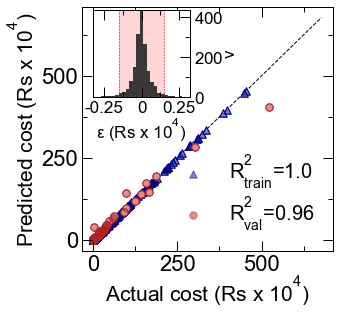

In [281]:
training(xgboostmodel,X_train,y_train,X_val,y_val) 

# Training GPR

In [230]:
#Gaussian Process Regression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
def gaussianprocess(X_train,y_train,X_val,y_val,X_test,y_test):
    kernel = ConstantKernel(1.0, (1e-3, 1e4)) * RBF(length_scale=1.0, length_scale_bounds=(1e-3, 1e3))
    gp_model=GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.05, normalize_y=True)
    gp_model.fit(X_train, y_train)
    rscoretrain=round((gp_model.score(X_train,y_train)),2)
    rscoreval=round((gp_model.score(X_val,y_val)),2)
    rscoretest=round((gp_model.score(X_test,y_test)),2)
    print("R-squared score Train: ", rscoretrain)
    print("R-squared score Validation: ", rscoreval)
    print("R-squared score Test: ", rscoretest)
    ypredicted = gp_model.predict(X_test)
    yactual = y_test

    # Fit regression line
    coef = np.polyfit(ypredicted, yactual, 1)
    poly1d_fn = np.poly1d(coef)


    # Plotting the scatter plot
    plt.scatter(y_train, y_train, color='dodgerblue', marker='^',alpha=0.7, label='R² Training= '+str(rscoretrain))
    plt.scatter(ypredicted, yactual, color='deeppink', marker='^',alpha=0.7, label='R² Test= '+str(rscoretest))
    
    # Adding labels and title to the plot
    plt.xlabel('Predicted Cost')
    plt.ylabel('Actual Cost')
    plt.title('Gaussian Process Regression')
    plt.legend()
    plt.xlim(0,50000)
    plt.ylim(0,50000)
    plt.show()

    # Fits the explainer
    # explainer = shap.Explainer(gp_model.predict, X_train)
    # Calculates the SHAP values - It takes some time
    # shap_values = explainer(X_train)
    # Evaluate SHAP values
    #shap_values = explainer.shap_values(X)
    # shap.plots.bar(shap_values)
    
    return(gp_model)

In [ ]:
gaussianmodel=gaussianprocess(X_train,y_train,X_val,y_val,X_test,y_test)

python(79735) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Exact explainer: 1727it [01:48, 14.53it/s]                          


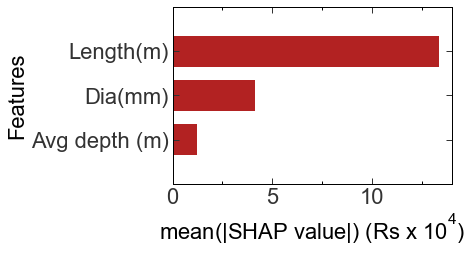

In [278]:
explainer_gpr = shap.Explainer(gaussianmodel.predict, X_train)
shap_values_gpr = explainer_gpr(X_train)

s = 22

new_captions = ['Dia(mm)', 'Length(m)', 'Avg depth (m)']

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True

_= shap.summary_plot(shap_values_Xgboost,show = False, 
                plot_type='bar',
                color_bar = False,
                color= "firebrick",
                feature_names = new_captions,
                features = X_train,      #Changed from X_train to X_test_scx as we are explaining all the predictions in test set
                plot_size=[6,3.5]  # Change this size as per requirement
                )
_= plt.ylabel('Features', fontsize = s, fontweight = 'normal')
fig=plt.gca()



_= fig.spines['top'].set_visible(True) 
_= fig.spines['right'].set_visible(True)
_= fig.spines['left'].set_visible(True)

visible_ticks = {
"top": True,
}
_= plt.tick_params(axis="x", which="both", **visible_ticks)
_= plt.tick_params(axis="y", which="both", **visible_ticks)
_= plt.tick_params(axis="y", which="major", direction = 'in', left = True)
_= plt.tick_params(axis="y", which="major", direction = 'in', right = True) #mean(|SHAP value|) (wt. %)
_= plt.xlabel('mean(|SHAP value|) (Rs x $10^{4}$)', fontsize= s, fontweight= 'normal')
X= [0,5,10]
X1 = [1, 50000, 100000]
_= plt.xticks(X1,X,fontsize = s, fontweight= 'normal')
_= plt.yticks(fontsize = s, fontweight= 'normal')
_= plt.tick_params(which = 'major', width= 1, length =6)
_= plt.tick_params(which = 'minor', width= 1, length =3)
# plt.yaxis.tick_right()
plt.savefig('./notebook_figures/shap_gpr_training.tiff',format='tiff', dpi=1200)
plt.show()

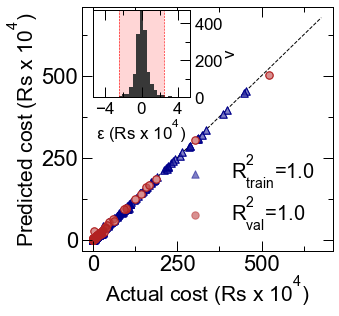

In [277]:
training(gaussianmodel,X_train,y_train,X_val,y_val)

## "Linear Regression"


In [ ]:
testing(linearmodel,Xdataset1_test,ydataset1_test)
testing(linearmodel,Xdataset2_test,ydataset2_test)
testing(linearmodel,Xdataset3_test,ydataset3_test)
testing(linearmodel,Xdataset4_test,ydataset4_test)
testing(linearmodel,Xdataset5_test,ydataset5_test)
testing(linearmodel,Xdataset6_test,ydataset6_test)
testing(linearmodel,Xdataset7_test,ydataset7_test)

## "Lasoo Regression"

In [ ]:
testing(lassomodel,Xdataset1_test,ydataset1_test)
testing(lassomodel,Xdataset2_test,ydataset2_test)
testing(lassomodel,Xdataset3_test,ydataset3_test)
testing(lassomodel,Xdataset4_test,ydataset4_test)
testing(lassomodel,Xdataset5_test,ydataset5_test)
testing(lassomodel,Xdataset6_test,ydataset6_test)
testing(lassomodel,Xdataset7_test,ydataset7_test)

## "ElasticNet Regression"

In [ ]:
testing(elasticnetmodel,Xdataset1_test,ydataset1_test)
testing(elasticnetmodel,Xdataset2_test,ydataset2_test)
testing(elasticnetmodel,Xdataset3_test,ydataset3_test)
testing(elasticnetmodel,Xdataset4_test,ydataset4_test)
testing(elasticnetmodel,Xdataset5_test,ydataset5_test)
testing(elasticnetmodel,Xdataset6_test,ydataset6_test)
testing(elasticnetmodel,Xdataset7_test,ydataset7_test)

## "Random Forest Regression"

In [ ]:
testing(randomforestmodel,Xdataset1_test,ydataset1_test)
testing(randomforestmodel,Xdataset2_test,ydataset2_test)
testing(randomforestmodel,Xdataset3_test,ydataset3_test)
testing(randomforestmodel,Xdataset4_test,ydataset4_test)
testing(randomforestmodel,Xdataset5_test,ydataset5_test)
testing(randomforestmodel,Xdataset6_test,ydataset6_test)
testing(randomforestmodel,Xdataset7_test,ydataset7_test)

# Testing XGBoost

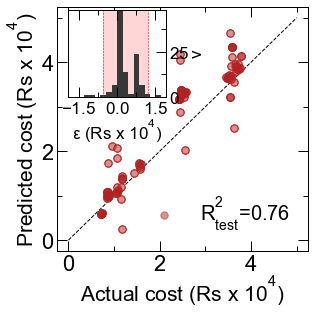

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


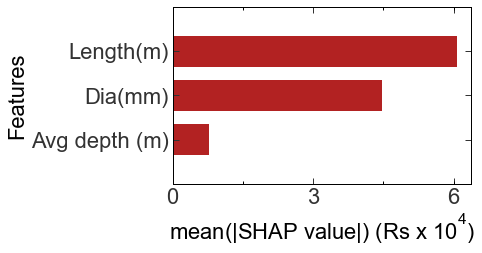

In [350]:
testing1(xgboostmodel,Xdataset1_test,ydataset1_test)

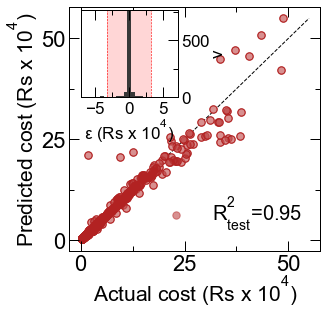

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


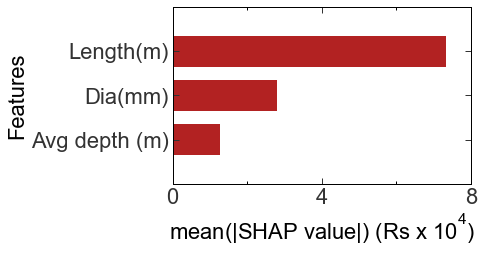

In [352]:
testing4(xgboostmodel,Xdataset4_test,ydataset4_test)


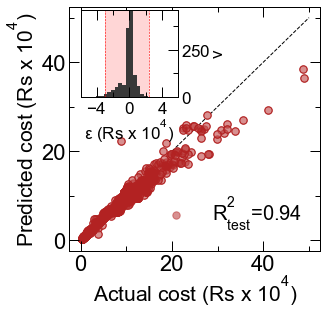

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


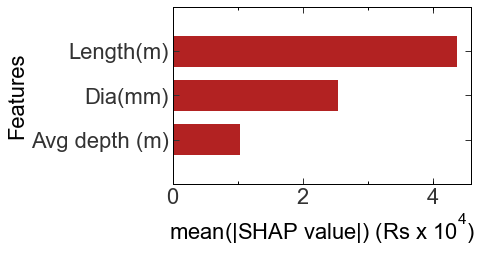

In [354]:

testing5(xgboostmodel,Xdataset5_test,ydataset5_test)


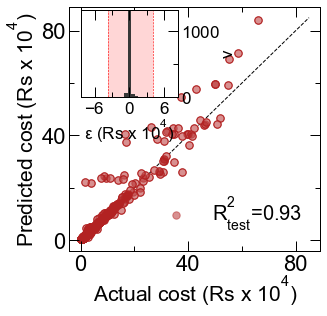

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


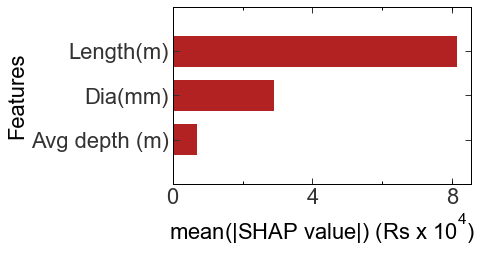

In [356]:

testing6(xgboostmodel,Xdataset6_test,ydataset6_test)

# Testing Gaussian Process Regression

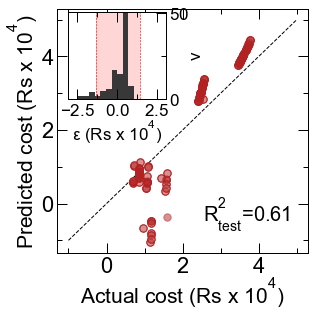

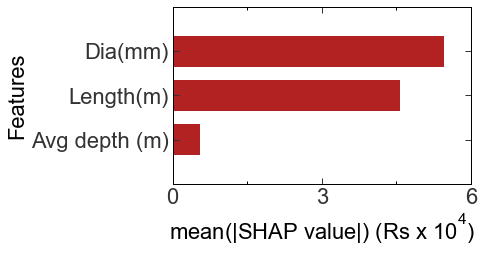

In [292]:
testing1gpr(gaussianmodel,Xdataset1_test,ydataset1_test)

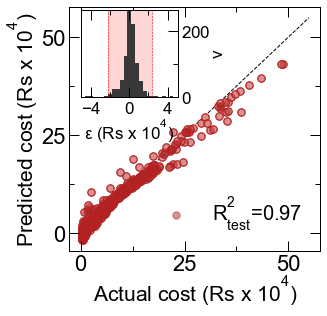

Exact explainer: 945it [00:55, 13.88it/s]                         


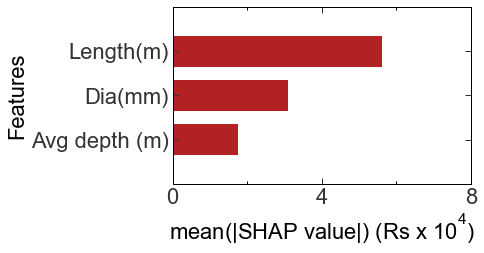

In [293]:
testing4gpr(gaussianmodel,Xdataset4_test,ydataset4_test)

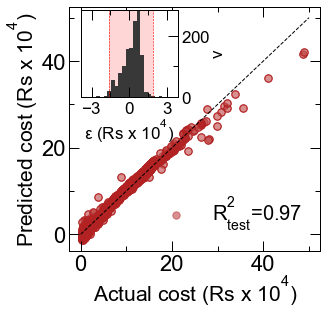

Exact explainer: 1332it [01:27, 13.46it/s]                          


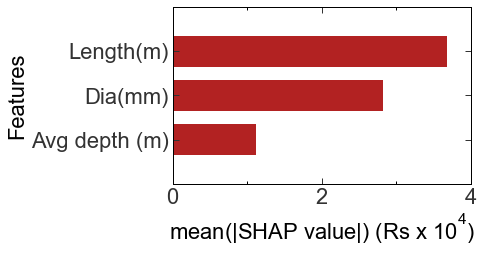

In [294]:
testing5gpr(gaussianmodel,Xdataset5_test,ydataset5_test)

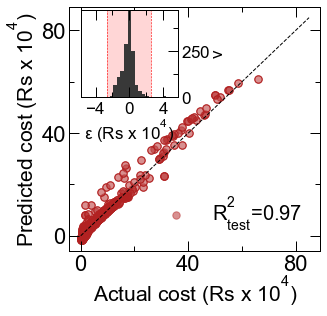

Exact explainer: 1519it [01:45, 13.04it/s]                          


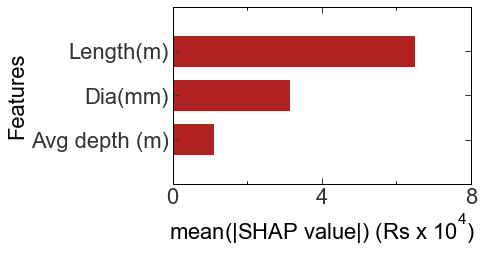

In [295]:
testing6gpr(gaussianmodel,Xdataset6_test,ydataset6_test)